# Multilayer Perceptron -  Manual - Base Binária

### Atualização dos pesos por iteração

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

### Carregamento da base

In [2]:
base = pd.read_csv('baseBinaria.txt')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1

### Padronização dos dados

In [3]:
for i in range (len(base.columns)-1):
    entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)

### Transformação das classes para o tipo dummy

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)
classes_dummy = np.array(pd.get_dummies(classes))

### Plotagem dos dados (colunas 1 e 2)

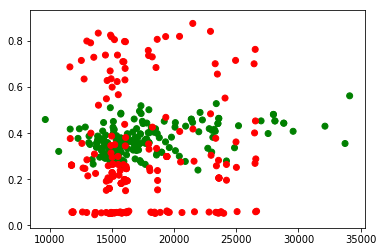

In [5]:
x = base.iloc[:,3].values
y = base.iloc[:,4].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classes]
plt.scatter(x, y, color=color)

### Divisão da base em treinamento (80%) e teste (20%)

In [6]:
entradas_trei, entradas_test, classes_trei, classes_test = train_test_split(entradas, classes_dummy, test_size=0.20)

### Métodos e demais variáveis necessárias

In [7]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

In [8]:
def funcaoAtivacao(soma, Usu_func):
    if (Usu_func == 1):
        return 1/(1 + np.exp(-soma))
    if (Usu_func == 2):
        return ((1 - np.exp(-soma))/(1 + np.exp(-soma)))
    return 0

In [9]:
def derivadaParcial(camadaSaida, Usu_func):
    if (Usu_func == 1):
        return camadaSaida * (1 - camadaSaida)
    if (Usu_func == 2):
        return 1/2 * (1 - (camadaSaida)**2)

In [10]:
def decacimentoTaxaAprend(realizar, tipo, taxaAprendIni, iteracaoAtual, NumIteracoes):
    if (realizar == 1):
        if (tipo == 1):
            # Linear
            return taxaAprendIni * (1 - (iteracaoAtual/NumIteracoes))            
        elif (tipo == 2):
            # Exponencial
             return taxaAprendIni/(1 + iteracaoAtual)  
    else:
        return taxaAprendIni
    

## Dados do usuário

In [11]:
NumClasses = unique(classes) + 1
epocas = int(input('\033[1m' + "Digite a quantidade de épocas: "))
taxaAprendOcul = float(input('\033[1m' + "Digite a taxa de aprendizado da camada oculta: "))
taxaAprendOculIni = taxaAprendOcul
decaimentoOcul = int(input('\033[1m' + "Deseja realizar decaimento da taxa de aprendizagem da camada Oculta? (1 - Sim ou 2 - Não): "))
if (decaimentoOcul == 1):
    print('\033[1m' + "Digite: ")
    print('\033[1m' + "1- Decaimento Linear: ")
    print('\033[1m' + "2- Decaimento exponencial: ")
    tipoDecaimentoOcul = int(input(""))
taxaAprendSai = float(input('\033[1m' + "Digite a taxa de aprendizado da camada de saída: "))
taxaAprendSaiIni = taxaAprendSai
decaimentoSai = int(input('\033[1m' + "Deseja realizar decaimento da taxa de aprendizagem da camada de Saída? (1 - Sim ou 2 - Não): "))
if (decaimentoSai == 1):
    print('\033[1m' + "Digite: ")
    print('\033[1m' + "1- Decaimento Linear: ")
    print('\033[1m' + "2- Decaimento exponencial: ")
    tipoDecaimentoSai = int(input(""))
print('\033[1m' + "Digite a quantidade de Neurônios da camada oculta: ")
print("1- Regra do Valor Médio")
print("2- Regra de Kolmogorov")
print("3- Regra de Fletcher-Gloss")
print("4- Regra da Raiz quadrada")
print("5- Inserir um valor manualmente")
escolha = int(input(""))
if (escolha == 1):
        # Regra do valor médio
        qtde =  int((NumClasses + NumColunas)/2)
if (escolha == 2):
        # Regra de Kolmogorov
        qtde =  int((2 * NumColunas) + 1)
if (escolha == 3):
        # Regra de Fletcher-Gloss
        a = int((2* (NumColunas ** (1/2)) + NumClasses))
        b = 2 * NumColunas + 1
        qtde = int(randint(a, b))      
if (escolha == 4):
        # Regra da raiz quadrada
        qtde = int((NumClasses * NumColunas)**(1/2))
if (escolha == 5):
        qtde = int(input("Digite a quantidade de neurônios que deseja inserir"))
NeuroniosCamadaOculta = qtde
print(NeuroniosCamadaOculta)
print('\033[1m' + "Função de ativação: ")
print("1- Logística")
print("2- Tangente Hiperbólica")
Usu_func = int(input("Digite o valor: "))


Digite a quantidade de épocas: 100
Digite a taxa de aprendizado da camada oculta: 0.5
Deseja realizar decaimento da taxa de aprendizagem da camada Oculta? (1 - Sim ou 2 - Não): 1
Digite: 
1- Decaimento Linear: 
2- Decaimento exponencial: 
1
Digite a taxa de aprendizado da camada de saída: 0.5
Deseja realizar decaimento da taxa de aprendizagem da camada de Saída? (1 - Sim ou 2 - Não): 1
Digite: 
1- Decaimento Linear: 
2- Decaimento exponencial: 
1
Digite a quantidade de Neurônios da camada oculta: 
1- Regra do Valor Médio
2- Regra de Kolmogorov
3- Regra de Fletcher-Gloss
4- Regra da Raiz quadrada
5- Inserir um valor manualmente
1
11
Função de ativação: 
1- Logística
2- Tangente Hiperbólica
Digite o valor: 1


In [12]:
PesoBiasOculta = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta,1)))

pesos0 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NumColunas,NeuroniosCamadaOculta)))
pesos1 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta, NumClasses)))
lb_style = LabelBinarizer()
classes_trei = lb_style.fit_transform(classes_trei)
num_entradas_trei = len(entradas_trei)
camadaSaida = np.zeros((num_entradas_trei, NumClasses))

## Treinamento

taxaAprendOcul: 0.5
taxaAprendSai: 0.5
taxaAprendOcul: 0.49843260188087773
taxaAprendSai: 0.49843260188087773
taxaAprendOcul: 0.49686520376175547
taxaAprendSai: 0.49686520376175547
taxaAprendOcul: 0.4952978056426332
taxaAprendSai: 0.4952978056426332
taxaAprendOcul: 0.493730407523511
taxaAprendSai: 0.493730407523511
taxaAprendOcul: 0.49216300940438873
taxaAprendSai: 0.49216300940438873
taxaAprendOcul: 0.49059561128526646
taxaAprendSai: 0.49059561128526646
taxaAprendOcul: 0.4890282131661442
taxaAprendSai: 0.4890282131661442
taxaAprendOcul: 0.48746081504702193
taxaAprendSai: 0.48746081504702193
taxaAprendOcul: 0.48589341692789967
taxaAprendSai: 0.48589341692789967
taxaAprendOcul: 0.48432601880877746
taxaAprendSai: 0.48432601880877746
taxaAprendOcul: 0.4827586206896552
taxaAprendSai: 0.4827586206896552
taxaAprendOcul: 0.48119122257053293
taxaAprendSai: 0.48119122257053293
taxaAprendOcul: 0.47962382445141066
taxaAprendSai: 0.47962382445141066
taxaAprendOcul: 0.4780564263322884
taxaAprendSai

taxaAprendOcul: 0.31191222570532917
taxaAprendSai: 0.31191222570532917
taxaAprendOcul: 0.3103448275862069
taxaAprendSai: 0.3103448275862069
taxaAprendOcul: 0.30877742946708464
taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.3072100313479624
taxaAprendOcul: 0.3056426332288401
taxaAprendSai: 0.3056426332288401
taxaAprendOcul: 0.3040752351097179
taxaAprendSai: 0.3040752351097179
taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905956
taxaAprendOcul: 0.30094043887147337
taxaAprendSai: 0.30094043887147337
taxaAprendOcul: 0.2993730407523511
taxaAprendSai: 0.2993730407523511
taxaAprendOcul: 0.29780564263322884
taxaAprendSai: 0.29780564263322884
taxaAprendOcul: 0.2962382445141066
taxaAprendSai: 0.2962382445141066
taxaAprendOcul: 0.2946708463949843
taxaAprendSai: 0.2946708463949843
taxaAprendOcul: 0.2931034482758621
taxaAprendSai: 0.2931034482758621
taxaAprendOcul: 0.2915360501567398
taxaAprendSai: 0.2915360501567398
taxaAprendOcul: 0.28996865

taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905956
taxaAprendOcul: 0.30094043887147337
taxaAprendSai: 0.30094043887147337
taxaAprendOcul: 0.2993730407523511
taxaAprendSai: 0.2993730407523511
taxaAprendOcul: 0.29780564263322884
taxaAprendSai: 0.29780564263322884
taxaAprendOcul: 0.2962382445141066
taxaAprendSai: 0.2962382445141066
taxaAprendOcul: 0.2946708463949843
taxaAprendSai: 0.2946708463949843
taxaAprendOcul: 0.2931034482758621
taxaAprendSai: 0.2931034482758621
taxaAprendOcul: 0.2915360501567398
taxaAprendSai: 0.2915360501567398
taxaAprendOcul: 0.28996865203761757
taxaAprendSai: 0.28996865203761757
taxaAprendOcul: 0.2884012539184953
taxaAprendSai: 0.2884012539184953
taxaAprendOcul: 0.28683385579937304
taxaAprendSai: 0.28683385579937304
taxaAprendOcul: 0.2852664576802508
taxaAprendSai: 0.2852664576802508
taxaAprendOcul: 0.2836990595611285
taxaAprendSai: 0.2836990595611285
taxaAprendOcul: 0.2821316614420063
taxaAprendSai: 0.2821316614420063
taxaAprendOcul: 0.28056426

taxaAprendOcul: 0.18808777429467083
taxaAprendSai: 0.18808777429467083
taxaAprendOcul: 0.18652037617554856
taxaAprendSai: 0.18652037617554856
taxaAprendOcul: 0.18495297805642635
taxaAprendSai: 0.18495297805642635
taxaAprendOcul: 0.1833855799373041
taxaAprendSai: 0.1833855799373041
taxaAprendOcul: 0.18181818181818182
taxaAprendSai: 0.18181818181818182
taxaAprendOcul: 0.18025078369905956
taxaAprendSai: 0.18025078369905956
taxaAprendOcul: 0.1786833855799373
taxaAprendSai: 0.1786833855799373
taxaAprendOcul: 0.17711598746081503
taxaAprendSai: 0.17711598746081503
taxaAprendOcul: 0.17554858934169276
taxaAprendSai: 0.17554858934169276
taxaAprendOcul: 0.17398119122257055
taxaAprendSai: 0.17398119122257055
taxaAprendOcul: 0.1724137931034483
taxaAprendSai: 0.1724137931034483
taxaAprendOcul: 0.17084639498432602
taxaAprendSai: 0.17084639498432602
taxaAprendOcul: 0.16927899686520376
taxaAprendSai: 0.16927899686520376
taxaAprendOcul: 0.1677115987460815
taxaAprendSai: 0.1677115987460815
taxaAprendOcul

taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730407524
taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297805642633
taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.34012539

taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297805642633
taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.3401253918495298
taxaAprendSai: 0.3401253918495298
taxaAprendOcul: 0.3385579937304075
taxaAprendSai: 0.3385579937304075
taxaAprendOcul: 0.3369905956112853
taxaAprendSai: 0.3369905956112853
taxaAprendOcul: 0.335423197492163
taxaAprendSai: 0.335423197492163
taxaAprendOcul: 0.3338557993730408
taxaAprendSai: 0.3338557993730408
taxaAprendOcul: 0.3322884012

taxaAprendOcul: 0.46238244514106586
taxaAprendSai: 0.46238244514106586
taxaAprendOcul: 0.4608150470219436
taxaAprendSai: 0.4608150470219436
taxaAprendOcul: 0.4592476489028213
taxaAprendSai: 0.4592476489028213
taxaAprendOcul: 0.45768025078369906
taxaAprendSai: 0.45768025078369906
taxaAprendOcul: 0.4561128526645768
taxaAprendSai: 0.4561128526645768
taxaAprendOcul: 0.45454545454545453
taxaAprendSai: 0.45454545454545453
taxaAprendOcul: 0.45297805642633227
taxaAprendSai: 0.45297805642633227
taxaAprendOcul: 0.45141065830721006
taxaAprendSai: 0.45141065830721006
taxaAprendOcul: 0.4498432601880878
taxaAprendSai: 0.4498432601880878
taxaAprendOcul: 0.4482758620689655
taxaAprendSai: 0.4482758620689655
taxaAprendOcul: 0.44670846394984326
taxaAprendSai: 0.44670846394984326
taxaAprendOcul: 0.445141065830721
taxaAprendSai: 0.445141065830721
taxaAprendOcul: 0.44357366771159873
taxaAprendSai: 0.44357366771159873
taxaAprendOcul: 0.44200626959247646
taxaAprendSai: 0.44200626959247646
taxaAprendOcul: 0.44

taxaAprendSai: 0.18025078369905956
taxaAprendOcul: 0.1786833855799373
taxaAprendSai: 0.1786833855799373
taxaAprendOcul: 0.17711598746081503
taxaAprendSai: 0.17711598746081503
taxaAprendOcul: 0.17554858934169276
taxaAprendSai: 0.17554858934169276
taxaAprendOcul: 0.17398119122257055
taxaAprendSai: 0.17398119122257055
taxaAprendOcul: 0.1724137931034483
taxaAprendSai: 0.1724137931034483
taxaAprendOcul: 0.17084639498432602
taxaAprendSai: 0.17084639498432602
taxaAprendOcul: 0.16927899686520376
taxaAprendSai: 0.16927899686520376
taxaAprendOcul: 0.1677115987460815
taxaAprendSai: 0.1677115987460815
taxaAprendOcul: 0.16614420062695923
taxaAprendSai: 0.16614420062695923
taxaAprendOcul: 0.16457680250783702
taxaAprendSai: 0.16457680250783702
taxaAprendOcul: 0.16300940438871475
taxaAprendSai: 0.16300940438871475
taxaAprendOcul: 0.1614420062695925
taxaAprendSai: 0.1614420062695925
taxaAprendOcul: 0.15987460815047022
taxaAprendSai: 0.15987460815047022
taxaAprendOcul: 0.15830721003134796
taxaAprendSai:

taxaAprendOcul: 0.23510971786833856
taxaAprendSai: 0.23510971786833856
taxaAprendOcul: 0.2335423197492163
taxaAprendSai: 0.2335423197492163
taxaAprendOcul: 0.23197492163009403
taxaAprendSai: 0.23197492163009403
taxaAprendOcul: 0.23040752351097177
taxaAprendSai: 0.23040752351097177
taxaAprendOcul: 0.2288401253918495
taxaAprendSai: 0.2288401253918495
taxaAprendOcul: 0.2272727272727273
taxaAprendSai: 0.2272727272727273
taxaAprendOcul: 0.22570532915360503
taxaAprendSai: 0.22570532915360503
taxaAprendOcul: 0.22413793103448276
taxaAprendSai: 0.22413793103448276
taxaAprendOcul: 0.2225705329153605
taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 

taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.018808777429467072
taxaAprendOcul: 0.017241379310344807
taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.012539184952978066
taxaAprendSai: 0.012539184952978066
taxaAprendOcul: 0.010971786833855801
taxaAprendSai: 0.010971786833855801
taxaAprendOcul: 0.009404388714733536
taxaAprendSai: 0.009404388714733536
taxaAprendOcul: 0.00783699059561127
taxaAprendSai: 0.00783699059561127
taxaAprendOcul: 0.006269592476489005
taxaAprendSai: 0.006269592476489005
taxaAprendOcul: 0.004702194357366796
taxaAprendSai: 0.004702194357366796
taxaAprendOcul: 0.0031347962382445305
taxaAprendSai: 

taxaAprendOcul: 0.11285266457680249
taxaAprendSai: 0.11285266457680249
taxaAprendOcul: 0.11128526645768028
taxaAprendSai: 0.11128526645768028
taxaAprendOcul: 0.10971786833855801
taxaAprendSai: 0.10971786833855801
taxaAprendOcul: 0.10815047021943575
taxaAprendSai: 0.10815047021943575
taxaAprendOcul: 0.10658307210031348
taxaAprendSai: 0.10658307210031348
taxaAprendOcul: 0.10501567398119122
taxaAprendSai: 0.10501567398119122
taxaAprendOcul: 0.10344827586206895
taxaAprendSai: 0.10344827586206895
taxaAprendOcul: 0.10188087774294668
taxaAprendSai: 0.10188087774294668
taxaAprendOcul: 0.10031347962382448
taxaAprendSai: 0.10031347962382448
taxaAprendOcul: 0.09874608150470221
taxaAprendSai: 0.09874608150470221
taxaAprendOcul: 0.09717868338557994
taxaAprendSai: 0.09717868338557994
taxaAprendOcul: 0.09561128526645768
taxaAprendSai: 0.09561128526645768
taxaAprendOcul: 0.09404388714733541
taxaAprendSai: 0.09404388714733541
taxaAprendOcul: 0.09247648902821315
taxaAprendSai: 0.09247648902821315
taxaAp

taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0.2115987460815047
taxaAprendOcul: 0.21003134796238243
taxaAprendSai: 0.21003134796238243
taxaAprendOcul: 0.20846394984326017
taxaAprendSai: 0.20846394984326017
taxaAprendOcul: 0.20689655172413796
taxaAprendSai: 0.20689655172413796
taxaAprendOcul: 0.2053291536050157
taxaAprendSai: 0.2053291536050157
taxaAprendOcul: 0.20376175548589343
taxaAprendSai: 0.20376175548589343
taxaAprendOcul: 0.20219435736677116
taxaAprendSai: 0.20219435736677116
taxaAprendOcul: 0.2006269592476489
taxaAprendSai:

taxaAprendOcul: 0.4890282131661442
taxaAprendSai: 0.4890282131661442
taxaAprendOcul: 0.48746081504702193
taxaAprendSai: 0.48746081504702193
taxaAprendOcul: 0.48589341692789967
taxaAprendSai: 0.48589341692789967
taxaAprendOcul: 0.48432601880877746
taxaAprendSai: 0.48432601880877746
taxaAprendOcul: 0.4827586206896552
taxaAprendSai: 0.4827586206896552
taxaAprendOcul: 0.48119122257053293
taxaAprendSai: 0.48119122257053293
taxaAprendOcul: 0.47962382445141066
taxaAprendSai: 0.47962382445141066
taxaAprendOcul: 0.4780564263322884
taxaAprendSai: 0.4780564263322884
taxaAprendOcul: 0.47648902821316613
taxaAprendSai: 0.47648902821316613
taxaAprendOcul: 0.47492163009404387
taxaAprendSai: 0.47492163009404387
taxaAprendOcul: 0.47335423197492166
taxaAprendSai: 0.47335423197492166
taxaAprendOcul: 0.4717868338557994
taxaAprendSai: 0.4717868338557994
taxaAprendOcul: 0.4702194357366771
taxaAprendSai: 0.4702194357366771
taxaAprendOcul: 0.46865203761755486
taxaAprendSai: 0.46865203761755486
taxaAprendOcul: 

taxaAprendOcul: 0.047021943573667735
taxaAprendSai: 0.047021943573667735
taxaAprendOcul: 0.04545454545454547
taxaAprendSai: 0.04545454545454547
taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.043887147335423204
taxaAprendOcul: 0.04231974921630094
taxaAprendSai: 0.04231974921630094
taxaAprendOcul: 0.040752351097178674
taxaAprendSai: 0.040752351097178674
taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.02664576802

taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.043887147335423204
taxaAprendOcul: 0.04231974921630094
taxaAprendSai: 0.04231974921630094
taxaAprendOcul: 0.040752351097178674
taxaAprendSai: 0.040752351097178674
taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.025078369905956133
taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971

taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730407524
taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971

taxaAprendSai: 0.2946708463949843
taxaAprendOcul: 0.2931034482758621
taxaAprendSai: 0.2931034482758621
taxaAprendOcul: 0.2915360501567398
taxaAprendSai: 0.2915360501567398
taxaAprendOcul: 0.28996865203761757
taxaAprendSai: 0.28996865203761757
taxaAprendOcul: 0.2884012539184953
taxaAprendSai: 0.2884012539184953
taxaAprendOcul: 0.28683385579937304
taxaAprendSai: 0.28683385579937304
taxaAprendOcul: 0.2852664576802508
taxaAprendSai: 0.2852664576802508
taxaAprendOcul: 0.2836990595611285
taxaAprendSai: 0.2836990595611285
taxaAprendOcul: 0.2821316614420063
taxaAprendSai: 0.2821316614420063
taxaAprendOcul: 0.280564263322884
taxaAprendSai: 0.280564263322884
taxaAprendOcul: 0.27899686520376177
taxaAprendSai: 0.27899686520376177
taxaAprendOcul: 0.2774294670846395
taxaAprendSai: 0.2774294670846395
taxaAprendOcul: 0.27586206896551724
taxaAprendSai: 0.27586206896551724
taxaAprendOcul: 0.274294670846395
taxaAprendSai: 0.274294670846395
taxaAprendOcul: 0.2727272727272727
taxaAprendSai: 0.2727272727272

taxaAprendOcul: 0.19749216300940436
taxaAprendSai: 0.19749216300940436
taxaAprendOcul: 0.19592476489028215
taxaAprendSai: 0.19592476489028215
taxaAprendOcul: 0.1943573667711599
taxaAprendSai: 0.1943573667711599
taxaAprendOcul: 0.19278996865203762
taxaAprendSai: 0.19278996865203762
taxaAprendOcul: 0.19122257053291536
taxaAprendSai: 0.19122257053291536
taxaAprendOcul: 0.1896551724137931
taxaAprendSai: 0.1896551724137931
taxaAprendOcul: 0.18808777429467083
taxaAprendSai: 0.18808777429467083
taxaAprendOcul: 0.18652037617554856
taxaAprendSai: 0.18652037617554856
taxaAprendOcul: 0.18495297805642635
taxaAprendSai: 0.18495297805642635
taxaAprendOcul: 0.1833855799373041
taxaAprendSai: 0.1833855799373041
taxaAprendOcul: 0.18181818181818182
taxaAprendSai: 0.18181818181818182
taxaAprendOcul: 0.18025078369905956
taxaAprendSai: 0.18025078369905956
taxaAprendOcul: 0.1786833855799373
taxaAprendSai: 0.1786833855799373
taxaAprendOcul: 0.17711598746081503
taxaAprendSai: 0.17711598746081503
taxaAprendOcul

taxaAprendOcul: 0.07680250783699061
taxaAprendSai: 0.07680250783699061
taxaAprendOcul: 0.07523510971786834
taxaAprendSai: 0.07523510971786834
taxaAprendOcul: 0.07366771159874608
taxaAprendSai: 0.07366771159874608
taxaAprendOcul: 0.07210031347962381
taxaAprendSai: 0.07210031347962381
taxaAprendOcul: 0.07053291536050155
taxaAprendSai: 0.07053291536050155
taxaAprendOcul: 0.06896551724137934
taxaAprendSai: 0.06896551724137934
taxaAprendOcul: 0.06739811912225707
taxaAprendSai: 0.06739811912225707
taxaAprendOcul: 0.0658307210031348
taxaAprendSai: 0.0658307210031348
taxaAprendOcul: 0.06426332288401254
taxaAprendSai: 0.06426332288401254
taxaAprendOcul: 0.06269592476489028
taxaAprendSai: 0.06269592476489028
taxaAprendOcul: 0.06112852664576801
taxaAprendSai: 0.06112852664576801
taxaAprendOcul: 0.059561128526645746
taxaAprendSai: 0.059561128526645746
taxaAprendOcul: 0.057993730407523536
taxaAprendSai: 0.057993730407523536
taxaAprendOcul: 0.05642633228840127
taxaAprendSai: 0.05642633228840127
taxa

taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.018808777429467072
taxaAprendOcul: 0.017241379310344807
taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.012539184952978066
taxaAprendSai: 0.012539184952978066
taxaAprendOcul: 0.010971786833855801
taxaAprendSai: 0.010971786833855801
taxaAprendOcul: 0.009404388714733536
taxaAprendSai: 0.009404388714733536
taxaAprendOcul: 0.00783699059561127
taxaAprendSai: 0.00783699059561127
taxaAprendOcul: 0.006269592476489005
taxaAprendSai: 0.006269592476489005
taxaAprendOcul: 0.004702194357366796
taxaAprendSai: 0.004702194357366796
taxaAprendOcul: 0.0031347962382445305
taxaAprendSai: 0.0031347962382445305
taxaAprendOcul:

taxaAprendOcul: 0.38087774294670845
taxaAprendSai: 0.38087774294670845
taxaAprendOcul: 0.3793103448275862
taxaAprendSai: 0.3793103448275862
taxaAprendOcul: 0.377742946708464
taxaAprendSai: 0.377742946708464
taxaAprendOcul: 0.3761755485893417
taxaAprendSai: 0.3761755485893417
taxaAprendOcul: 0.37460815047021945
taxaAprendSai: 0.37460815047021945
taxaAprendOcul: 0.3730407523510972
taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.35893416

taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.3401253918495298
taxaAprendSai: 0.3401253918495298
taxaAprendOcul: 0.3385579937304075
taxaAprendSai: 0.3385579937304075
taxaAprendOcul: 0.3369905956112853
taxaAprendSai: 0.3369905956112853
taxaAprendOcul: 0.335423197492163
taxaAprendSai: 0.335423197492163
taxaAprendOcul: 0.3338557993730408
taxaAprendSai: 0.3338557993730408
taxaAprendOcul: 0.3322884012539185
taxaAprendSai: 0.3322884012539185
taxaAprendOcul: 0.33072100313479624
taxaAprendSai: 0.33072100313479624
taxaAprendOcul: 0.329153605015674
taxaAprendSai: 0.329153605015674
taxaAprendOcul: 0.3275862068965517
taxaAprendSai: 0.3275862068965517
taxaAprendOcul: 0.32601880877742

taxaAprendOcul: 0.06426332288401254
taxaAprendSai: 0.06426332288401254
taxaAprendOcul: 0.06269592476489028
taxaAprendSai: 0.06269592476489028
taxaAprendOcul: 0.06112852664576801
taxaAprendSai: 0.06112852664576801
taxaAprendOcul: 0.059561128526645746
taxaAprendSai: 0.059561128526645746
taxaAprendOcul: 0.057993730407523536
taxaAprendSai: 0.057993730407523536
taxaAprendOcul: 0.05642633228840127
taxaAprendSai: 0.05642633228840127
taxaAprendOcul: 0.054858934169279006
taxaAprendSai: 0.054858934169279006
taxaAprendOcul: 0.05329153605015674
taxaAprendSai: 0.05329153605015674
taxaAprendOcul: 0.051724137931034475
taxaAprendSai: 0.051724137931034475
taxaAprendOcul: 0.05015673981191221
taxaAprendSai: 0.05015673981191221
taxaAprendOcul: 0.048589341692789945
taxaAprendSai: 0.048589341692789945
taxaAprendOcul: 0.047021943573667735
taxaAprendSai: 0.047021943573667735
taxaAprendOcul: 0.04545454545454547
taxaAprendSai: 0.04545454545454547
taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.04388714733

taxaAprendOcul: 0.4952978056426332
taxaAprendSai: 0.4952978056426332
taxaAprendOcul: 0.493730407523511
taxaAprendSai: 0.493730407523511
taxaAprendOcul: 0.49216300940438873
taxaAprendSai: 0.49216300940438873
taxaAprendOcul: 0.49059561128526646
taxaAprendSai: 0.49059561128526646
taxaAprendOcul: 0.4890282131661442
taxaAprendSai: 0.4890282131661442
taxaAprendOcul: 0.48746081504702193
taxaAprendSai: 0.48746081504702193
taxaAprendOcul: 0.48589341692789967
taxaAprendSai: 0.48589341692789967
taxaAprendOcul: 0.48432601880877746
taxaAprendSai: 0.48432601880877746
taxaAprendOcul: 0.4827586206896552
taxaAprendSai: 0.4827586206896552
taxaAprendOcul: 0.48119122257053293
taxaAprendSai: 0.48119122257053293
taxaAprendOcul: 0.47962382445141066
taxaAprendSai: 0.47962382445141066
taxaAprendOcul: 0.4780564263322884
taxaAprendSai: 0.4780564263322884
taxaAprendOcul: 0.47648902821316613
taxaAprendSai: 0.47648902821316613
taxaAprendOcul: 0.47492163009404387
taxaAprendSai: 0.47492163009404387
taxaAprendOcul: 0.

taxaAprendOcul: 0.4263322884012539
taxaAprendSai: 0.4263322884012539
taxaAprendOcul: 0.42476489028213166
taxaAprendSai: 0.42476489028213166
taxaAprendOcul: 0.4231974921630094
taxaAprendSai: 0.4231974921630094
taxaAprendOcul: 0.4216300940438871
taxaAprendSai: 0.4216300940438871
taxaAprendOcul: 0.42006269592476486
taxaAprendSai: 0.42006269592476486
taxaAprendOcul: 0.41849529780564265
taxaAprendSai: 0.41849529780564265
taxaAprendOcul: 0.4169278996865204
taxaAprendSai: 0.4169278996865204
taxaAprendOcul: 0.4153605015673981
taxaAprendSai: 0.4153605015673981
taxaAprendOcul: 0.41379310344827586
taxaAprendSai: 0.41379310344827586
taxaAprendOcul: 0.4122257053291536
taxaAprendSai: 0.4122257053291536
taxaAprendOcul: 0.4106583072100314
taxaAprendSai: 0.4106583072100314
taxaAprendOcul: 0.40909090909090906
taxaAprendSai: 0.40909090909090906
taxaAprendOcul: 0.40752351097178685
taxaAprendSai: 0.40752351097178685
taxaAprendOcul: 0.4059561128526646
taxaAprendSai: 0.4059561128526646
taxaAprendOcul: 0.4043

taxaAprendOcul: 0.49843260188087773
taxaAprendSai: 0.49843260188087773
taxaAprendOcul: 0.49686520376175547
taxaAprendSai: 0.49686520376175547
taxaAprendOcul: 0.4952978056426332
taxaAprendSai: 0.4952978056426332
taxaAprendOcul: 0.493730407523511
taxaAprendSai: 0.493730407523511
taxaAprendOcul: 0.49216300940438873
taxaAprendSai: 0.49216300940438873
taxaAprendOcul: 0.49059561128526646
taxaAprendSai: 0.49059561128526646
taxaAprendOcul: 0.4890282131661442
taxaAprendSai: 0.4890282131661442
taxaAprendOcul: 0.48746081504702193
taxaAprendSai: 0.48746081504702193
taxaAprendOcul: 0.48589341692789967
taxaAprendSai: 0.48589341692789967
taxaAprendOcul: 0.48432601880877746
taxaAprendSai: 0.48432601880877746
taxaAprendOcul: 0.4827586206896552
taxaAprendSai: 0.4827586206896552
taxaAprendOcul: 0.48119122257053293
taxaAprendSai: 0.48119122257053293
taxaAprendOcul: 0.47962382445141066
taxaAprendSai: 0.47962382445141066
taxaAprendOcul: 0.4780564263322884
taxaAprendSai: 0.4780564263322884
taxaAprendOcul: 0.

taxaAprendOcul: 0.4169278996865204
taxaAprendSai: 0.4169278996865204
taxaAprendOcul: 0.4153605015673981
taxaAprendSai: 0.4153605015673981
taxaAprendOcul: 0.41379310344827586
taxaAprendSai: 0.41379310344827586
taxaAprendOcul: 0.4122257053291536
taxaAprendSai: 0.4122257053291536
taxaAprendOcul: 0.4106583072100314
taxaAprendSai: 0.4106583072100314
taxaAprendOcul: 0.40909090909090906
taxaAprendSai: 0.40909090909090906
taxaAprendOcul: 0.40752351097178685
taxaAprendSai: 0.40752351097178685
taxaAprendOcul: 0.4059561128526646
taxaAprendSai: 0.4059561128526646
taxaAprendOcul: 0.4043887147335423
taxaAprendSai: 0.4043887147335423
taxaAprendOcul: 0.40282131661442006
taxaAprendSai: 0.40282131661442006
taxaAprendOcul: 0.4012539184952978
taxaAprendSai: 0.4012539184952978
taxaAprendOcul: 0.3996865203761756
taxaAprendSai: 0.3996865203761756
taxaAprendOcul: 0.39811912225705326
taxaAprendSai: 0.39811912225705326
taxaAprendOcul: 0.39655172413793105
taxaAprendSai: 0.39655172413793105
taxaAprendOcul: 0.3949

taxaAprendSai: 0.3244514106583072
taxaAprendOcul: 0.322884012539185
taxaAprendSai: 0.322884012539185
taxaAprendOcul: 0.3213166144200627
taxaAprendSai: 0.3213166144200627
taxaAprendOcul: 0.31974921630094044
taxaAprendSai: 0.31974921630094044
taxaAprendOcul: 0.3181818181818182
taxaAprendSai: 0.3181818181818182
taxaAprendOcul: 0.3166144200626959
taxaAprendSai: 0.3166144200626959
taxaAprendOcul: 0.3150470219435737
taxaAprendSai: 0.3150470219435737
taxaAprendOcul: 0.3134796238244514
taxaAprendSai: 0.3134796238244514
taxaAprendOcul: 0.31191222570532917
taxaAprendSai: 0.31191222570532917
taxaAprendOcul: 0.3103448275862069
taxaAprendSai: 0.3103448275862069
taxaAprendOcul: 0.30877742946708464
taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.3072100313479624
taxaAprendOcul: 0.3056426332288401
taxaAprendSai: 0.3056426332288401
taxaAprendOcul: 0.3040752351097179
taxaAprendSai: 0.3040752351097179
taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905

taxaAprendOcul: 0.3369905956112853
taxaAprendSai: 0.3369905956112853
taxaAprendOcul: 0.335423197492163
taxaAprendSai: 0.335423197492163
taxaAprendOcul: 0.3338557993730408
taxaAprendSai: 0.3338557993730408
taxaAprendOcul: 0.3322884012539185
taxaAprendSai: 0.3322884012539185
taxaAprendOcul: 0.33072100313479624
taxaAprendSai: 0.33072100313479624
taxaAprendOcul: 0.329153605015674
taxaAprendSai: 0.329153605015674
taxaAprendOcul: 0.3275862068965517
taxaAprendSai: 0.3275862068965517
taxaAprendOcul: 0.3260188087774295
taxaAprendSai: 0.3260188087774295
taxaAprendOcul: 0.3244514106583072
taxaAprendSai: 0.3244514106583072
taxaAprendOcul: 0.322884012539185
taxaAprendSai: 0.322884012539185
taxaAprendOcul: 0.3213166144200627
taxaAprendSai: 0.3213166144200627
taxaAprendOcul: 0.31974921630094044
taxaAprendSai: 0.31974921630094044
taxaAprendOcul: 0.3181818181818182
taxaAprendSai: 0.3181818181818182
taxaAprendOcul: 0.3166144200626959
taxaAprendSai: 0.3166144200626959
taxaAprendOcul: 0.3150470219435737
t

taxaAprendOcul: 0.14890282131661442
taxaAprendSai: 0.14890282131661442
taxaAprendOcul: 0.14733542319749215
taxaAprendSai: 0.14733542319749215
taxaAprendOcul: 0.1457680250783699
taxaAprendSai: 0.1457680250783699
taxaAprendOcul: 0.14420062695924762
taxaAprendSai: 0.14420062695924762
taxaAprendOcul: 0.14263322884012541
taxaAprendSai: 0.14263322884012541
taxaAprendOcul: 0.14106583072100315
taxaAprendSai: 0.14106583072100315
taxaAprendOcul: 0.13949843260188088
taxaAprendSai: 0.13949843260188088
taxaAprendOcul: 0.13793103448275862
taxaAprendSai: 0.13793103448275862
taxaAprendOcul: 0.13636363636363635
taxaAprendSai: 0.13636363636363635
taxaAprendOcul: 0.1347962382445141
taxaAprendSai: 0.1347962382445141
taxaAprendOcul: 0.13322884012539182
taxaAprendSai: 0.13322884012539182
taxaAprendOcul: 0.1316614420062696
taxaAprendSai: 0.1316614420062696
taxaAprendOcul: 0.13009404388714735
taxaAprendSai: 0.13009404388714735
taxaAprendOcul: 0.12852664576802508
taxaAprendSai: 0.12852664576802508
taxaAprendOc

taxaAprendOcul: 0.25705329153605017
taxaAprendSai: 0.25705329153605017
taxaAprendOcul: 0.2554858934169279
taxaAprendSai: 0.2554858934169279
taxaAprendOcul: 0.25391849529780564
taxaAprendSai: 0.25391849529780564
taxaAprendOcul: 0.2523510971786834
taxaAprendSai: 0.2523510971786834
taxaAprendOcul: 0.2507836990595611
taxaAprendSai: 0.2507836990595611
taxaAprendOcul: 0.2492163009404389
taxaAprendSai: 0.2492163009404389
taxaAprendOcul: 0.24764890282131663
taxaAprendSai: 0.24764890282131663
taxaAprendOcul: 0.24608150470219436
taxaAprendSai: 0.24608150470219436
taxaAprendOcul: 0.2445141065830721
taxaAprendSai: 0.2445141065830721
taxaAprendOcul: 0.24294670846394983
taxaAprendSai: 0.24294670846394983
taxaAprendOcul: 0.24137931034482757
taxaAprendSai: 0.24137931034482757
taxaAprendOcul: 0.2398119122257053
taxaAprendSai: 0.2398119122257053
taxaAprendOcul: 0.2382445141065831
taxaAprendSai: 0.2382445141065831
taxaAprendOcul: 0.23667711598746083
taxaAprendSai: 0.23667711598746083
taxaAprendOcul: 0.23

taxaAprendOcul: 0.04231974921630094
taxaAprendSai: 0.04231974921630094
taxaAprendOcul: 0.040752351097178674
taxaAprendSai: 0.040752351097178674
taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.025078369905956133
taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573

taxaAprendSai: 0.08307210031347961
taxaAprendOcul: 0.08150470219435735
taxaAprendSai: 0.08150470219435735
taxaAprendOcul: 0.07993730407523508
taxaAprendSai: 0.07993730407523508
taxaAprendOcul: 0.07836990595611287
taxaAprendSai: 0.07836990595611287
taxaAprendOcul: 0.07680250783699061
taxaAprendSai: 0.07680250783699061
taxaAprendOcul: 0.07523510971786834
taxaAprendSai: 0.07523510971786834
taxaAprendOcul: 0.07366771159874608
taxaAprendSai: 0.07366771159874608
taxaAprendOcul: 0.07210031347962381
taxaAprendSai: 0.07210031347962381
taxaAprendOcul: 0.07053291536050155
taxaAprendSai: 0.07053291536050155
taxaAprendOcul: 0.06896551724137934
taxaAprendSai: 0.06896551724137934
taxaAprendOcul: 0.06739811912225707
taxaAprendSai: 0.06739811912225707
taxaAprendOcul: 0.0658307210031348
taxaAprendSai: 0.0658307210031348
taxaAprendOcul: 0.06426332288401254
taxaAprendSai: 0.06426332288401254
taxaAprendOcul: 0.06269592476489028
taxaAprendSai: 0.06269592476489028
taxaAprendOcul: 0.06112852664576801
taxaApre

taxaAprendOcul: 0.19122257053291536
taxaAprendSai: 0.19122257053291536
taxaAprendOcul: 0.1896551724137931
taxaAprendSai: 0.1896551724137931
taxaAprendOcul: 0.18808777429467083
taxaAprendSai: 0.18808777429467083
taxaAprendOcul: 0.18652037617554856
taxaAprendSai: 0.18652037617554856
taxaAprendOcul: 0.18495297805642635
taxaAprendSai: 0.18495297805642635
taxaAprendOcul: 0.1833855799373041
taxaAprendSai: 0.1833855799373041
taxaAprendOcul: 0.18181818181818182
taxaAprendSai: 0.18181818181818182
taxaAprendOcul: 0.18025078369905956
taxaAprendSai: 0.18025078369905956
taxaAprendOcul: 0.1786833855799373
taxaAprendSai: 0.1786833855799373
taxaAprendOcul: 0.17711598746081503
taxaAprendSai: 0.17711598746081503
taxaAprendOcul: 0.17554858934169276
taxaAprendSai: 0.17554858934169276
taxaAprendOcul: 0.17398119122257055
taxaAprendSai: 0.17398119122257055
taxaAprendOcul: 0.1724137931034483
taxaAprendSai: 0.1724137931034483
taxaAprendOcul: 0.17084639498432602
taxaAprendSai: 0.17084639498432602
taxaAprendOcul

taxaAprendOcul: 0.08620689655172414
taxaAprendSai: 0.08620689655172414
taxaAprendOcul: 0.08463949843260188
taxaAprendSai: 0.08463949843260188
taxaAprendOcul: 0.08307210031347961
taxaAprendSai: 0.08307210031347961
taxaAprendOcul: 0.08150470219435735
taxaAprendSai: 0.08150470219435735
taxaAprendOcul: 0.07993730407523508
taxaAprendSai: 0.07993730407523508
taxaAprendOcul: 0.07836990595611287
taxaAprendSai: 0.07836990595611287
taxaAprendOcul: 0.07680250783699061
taxaAprendSai: 0.07680250783699061
taxaAprendOcul: 0.07523510971786834
taxaAprendSai: 0.07523510971786834
taxaAprendOcul: 0.07366771159874608
taxaAprendSai: 0.07366771159874608
taxaAprendOcul: 0.07210031347962381
taxaAprendSai: 0.07210031347962381
taxaAprendOcul: 0.07053291536050155
taxaAprendSai: 0.07053291536050155
taxaAprendOcul: 0.06896551724137934
taxaAprendSai: 0.06896551724137934
taxaAprendOcul: 0.06739811912225707
taxaAprendSai: 0.06739811912225707
taxaAprendOcul: 0.0658307210031348
taxaAprendSai: 0.0658307210031348
taxaApre

taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.012539184952978066
taxaAprendSai: 0.012539184952978066
taxaAprendOcul: 0.010971786833855801
taxaAprendSai: 0.010971786833855801
taxaAprendOcul: 0.009404388714733536
taxaAprendSai: 0.009404388714733536
taxaAprendOcul: 0.00783699059561127
taxaAprendSai: 0.00783699059561127
taxaAprendOcul: 0.006269592476489005
taxaAprendSai: 0.006269592476489005
taxaAprendOcul: 0.004702194357366796
taxaAprendSai: 0.004702194357366796
taxaAprendOcul: 0.0031347962382445305
taxaAprendSai: 0.0031347962382445305
taxaAprendOcul: 0.0015673981191222652
taxaAprendSai: 0.0015673981191222652
taxaAprendOcul: 0.5
taxaAprendSai: 0.5
taxaAprendOcul: 0.49843260188087773
taxaAprendSai: 0.49843260188087773
taxaAprendOcul: 0.49686520376175547
taxaAprendSai: 0.49686520376175547
taxaAprendOcul: 0.4952978056426332
taxaAprendSai: 0

taxaAprendSai: 0.2335423197492163
taxaAprendOcul: 0.23197492163009403
taxaAprendSai: 0.23197492163009403
taxaAprendOcul: 0.23040752351097177
taxaAprendSai: 0.23040752351097177
taxaAprendOcul: 0.2288401253918495
taxaAprendSai: 0.2288401253918495
taxaAprendOcul: 0.2272727272727273
taxaAprendSai: 0.2272727272727273
taxaAprendOcul: 0.22570532915360503
taxaAprendSai: 0.22570532915360503
taxaAprendOcul: 0.22413793103448276
taxaAprendSai: 0.22413793103448276
taxaAprendOcul: 0.2225705329153605
taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0

taxaAprendOcul: 0.4498432601880878
taxaAprendSai: 0.4498432601880878
taxaAprendOcul: 0.4482758620689655
taxaAprendSai: 0.4482758620689655
taxaAprendOcul: 0.44670846394984326
taxaAprendSai: 0.44670846394984326
taxaAprendOcul: 0.445141065830721
taxaAprendSai: 0.445141065830721
taxaAprendOcul: 0.44357366771159873
taxaAprendSai: 0.44357366771159873
taxaAprendOcul: 0.44200626959247646
taxaAprendSai: 0.44200626959247646
taxaAprendOcul: 0.44043887147335425
taxaAprendSai: 0.44043887147335425
taxaAprendOcul: 0.438871473354232
taxaAprendSai: 0.438871473354232
taxaAprendOcul: 0.4373040752351097
taxaAprendSai: 0.4373040752351097
taxaAprendOcul: 0.43573667711598746
taxaAprendSai: 0.43573667711598746
taxaAprendOcul: 0.4341692789968652
taxaAprendSai: 0.4341692789968652
taxaAprendOcul: 0.43260188087774293
taxaAprendSai: 0.43260188087774293
taxaAprendOcul: 0.43103448275862066
taxaAprendSai: 0.43103448275862066
taxaAprendOcul: 0.42946708463949845
taxaAprendSai: 0.42946708463949845
taxaAprendOcul: 0.4278

taxaAprendOcul: 0.16614420062695923
taxaAprendSai: 0.16614420062695923
taxaAprendOcul: 0.16457680250783702
taxaAprendSai: 0.16457680250783702
taxaAprendOcul: 0.16300940438871475
taxaAprendSai: 0.16300940438871475
taxaAprendOcul: 0.1614420062695925
taxaAprendSai: 0.1614420062695925
taxaAprendOcul: 0.15987460815047022
taxaAprendSai: 0.15987460815047022
taxaAprendOcul: 0.15830721003134796
taxaAprendSai: 0.15830721003134796
taxaAprendOcul: 0.1567398119122257
taxaAprendSai: 0.1567398119122257
taxaAprendOcul: 0.15517241379310343
taxaAprendSai: 0.15517241379310343
taxaAprendOcul: 0.15360501567398122
taxaAprendSai: 0.15360501567398122
taxaAprendOcul: 0.15203761755485895
taxaAprendSai: 0.15203761755485895
taxaAprendOcul: 0.15047021943573669
taxaAprendSai: 0.15047021943573669
taxaAprendOcul: 0.14890282131661442
taxaAprendSai: 0.14890282131661442
taxaAprendOcul: 0.14733542319749215
taxaAprendSai: 0.14733542319749215
taxaAprendOcul: 0.1457680250783699
taxaAprendSai: 0.1457680250783699
taxaAprendOc

taxaAprendSai: 0.384012539184953
taxaAprendOcul: 0.3824451410658307
taxaAprendSai: 0.3824451410658307
taxaAprendOcul: 0.38087774294670845
taxaAprendSai: 0.38087774294670845
taxaAprendOcul: 0.3793103448275862
taxaAprendSai: 0.3793103448275862
taxaAprendOcul: 0.377742946708464
taxaAprendSai: 0.377742946708464
taxaAprendOcul: 0.3761755485893417
taxaAprendSai: 0.3761755485893417
taxaAprendOcul: 0.37460815047021945
taxaAprendSai: 0.37460815047021945
taxaAprendOcul: 0.3730407523510972
taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655

taxaAprendSai: 0.49216300940438873
taxaAprendOcul: 0.49059561128526646
taxaAprendSai: 0.49059561128526646
taxaAprendOcul: 0.4890282131661442
taxaAprendSai: 0.4890282131661442
taxaAprendOcul: 0.48746081504702193
taxaAprendSai: 0.48746081504702193
taxaAprendOcul: 0.48589341692789967
taxaAprendSai: 0.48589341692789967
taxaAprendOcul: 0.48432601880877746
taxaAprendSai: 0.48432601880877746
taxaAprendOcul: 0.4827586206896552
taxaAprendSai: 0.4827586206896552
taxaAprendOcul: 0.48119122257053293
taxaAprendSai: 0.48119122257053293
taxaAprendOcul: 0.47962382445141066
taxaAprendSai: 0.47962382445141066
taxaAprendOcul: 0.4780564263322884
taxaAprendSai: 0.4780564263322884
taxaAprendOcul: 0.47648902821316613
taxaAprendSai: 0.47648902821316613
taxaAprendOcul: 0.47492163009404387
taxaAprendSai: 0.47492163009404387
taxaAprendOcul: 0.47335423197492166
taxaAprendSai: 0.47335423197492166
taxaAprendOcul: 0.4717868338557994
taxaAprendSai: 0.4717868338557994
taxaAprendOcul: 0.4702194357366771
taxaAprendSai: 

taxaAprendOcul: 0.26802507836990597
taxaAprendSai: 0.26802507836990597
taxaAprendOcul: 0.2664576802507837
taxaAprendSai: 0.2664576802507837
taxaAprendOcul: 0.26489028213166144
taxaAprendSai: 0.26489028213166144
taxaAprendOcul: 0.26332288401253917
taxaAprendSai: 0.26332288401253917
taxaAprendOcul: 0.2617554858934169
taxaAprendSai: 0.2617554858934169
taxaAprendOcul: 0.2601880877742947
taxaAprendSai: 0.2601880877742947
taxaAprendOcul: 0.2586206896551724
taxaAprendSai: 0.2586206896551724
taxaAprendOcul: 0.25705329153605017
taxaAprendSai: 0.25705329153605017
taxaAprendOcul: 0.2554858934169279
taxaAprendSai: 0.2554858934169279
taxaAprendOcul: 0.25391849529780564
taxaAprendSai: 0.25391849529780564
taxaAprendOcul: 0.2523510971786834
taxaAprendSai: 0.2523510971786834
taxaAprendOcul: 0.2507836990595611
taxaAprendSai: 0.2507836990595611
taxaAprendOcul: 0.2492163009404389
taxaAprendSai: 0.2492163009404389
taxaAprendOcul: 0.24764890282131663
taxaAprendSai: 0.24764890282131663
taxaAprendOcul: 0.2460

taxaAprendOcul: 0.3166144200626959
taxaAprendSai: 0.3166144200626959
taxaAprendOcul: 0.3150470219435737
taxaAprendSai: 0.3150470219435737
taxaAprendOcul: 0.3134796238244514
taxaAprendSai: 0.3134796238244514
taxaAprendOcul: 0.31191222570532917
taxaAprendSai: 0.31191222570532917
taxaAprendOcul: 0.3103448275862069
taxaAprendSai: 0.3103448275862069
taxaAprendOcul: 0.30877742946708464
taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.3072100313479624
taxaAprendOcul: 0.3056426332288401
taxaAprendSai: 0.3056426332288401
taxaAprendOcul: 0.3040752351097179
taxaAprendSai: 0.3040752351097179
taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905956
taxaAprendOcul: 0.30094043887147337
taxaAprendSai: 0.30094043887147337
taxaAprendOcul: 0.2993730407523511
taxaAprendSai: 0.2993730407523511
taxaAprendOcul: 0.29780564263322884
taxaAprendSai: 0.29780564263322884
taxaAprendOcul: 0.2962382445141066
taxaAprendSai: 0.2962382445141066
taxaAprendOcul: 0.29467084

taxaAprendSai: 0.4263322884012539
taxaAprendOcul: 0.42476489028213166
taxaAprendSai: 0.42476489028213166
taxaAprendOcul: 0.4231974921630094
taxaAprendSai: 0.4231974921630094
taxaAprendOcul: 0.4216300940438871
taxaAprendSai: 0.4216300940438871
taxaAprendOcul: 0.42006269592476486
taxaAprendSai: 0.42006269592476486
taxaAprendOcul: 0.41849529780564265
taxaAprendSai: 0.41849529780564265
taxaAprendOcul: 0.4169278996865204
taxaAprendSai: 0.4169278996865204
taxaAprendOcul: 0.4153605015673981
taxaAprendSai: 0.4153605015673981
taxaAprendOcul: 0.41379310344827586
taxaAprendSai: 0.41379310344827586
taxaAprendOcul: 0.4122257053291536
taxaAprendSai: 0.4122257053291536
taxaAprendOcul: 0.4106583072100314
taxaAprendSai: 0.4106583072100314
taxaAprendOcul: 0.40909090909090906
taxaAprendSai: 0.40909090909090906
taxaAprendOcul: 0.40752351097178685
taxaAprendSai: 0.40752351097178685
taxaAprendOcul: 0.4059561128526646
taxaAprendSai: 0.4059561128526646
taxaAprendOcul: 0.4043887147335423
taxaAprendSai: 0.40438

taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.025078369905956133
taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.018808777429467072
taxaAprendOcul: 0.017241379310344807
taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.0125

taxaAprendSai: 0.2727272727272727
taxaAprendOcul: 0.2711598746081505
taxaAprendSai: 0.2711598746081505
taxaAprendOcul: 0.2695924764890282
taxaAprendSai: 0.2695924764890282
taxaAprendOcul: 0.26802507836990597
taxaAprendSai: 0.26802507836990597
taxaAprendOcul: 0.2664576802507837
taxaAprendSai: 0.2664576802507837
taxaAprendOcul: 0.26489028213166144
taxaAprendSai: 0.26489028213166144
taxaAprendOcul: 0.26332288401253917
taxaAprendSai: 0.26332288401253917
taxaAprendOcul: 0.2617554858934169
taxaAprendSai: 0.2617554858934169
taxaAprendOcul: 0.2601880877742947
taxaAprendSai: 0.2601880877742947
taxaAprendOcul: 0.2586206896551724
taxaAprendSai: 0.2586206896551724
taxaAprendOcul: 0.25705329153605017
taxaAprendSai: 0.25705329153605017
taxaAprendOcul: 0.2554858934169279
taxaAprendSai: 0.2554858934169279
taxaAprendOcul: 0.25391849529780564
taxaAprendSai: 0.25391849529780564
taxaAprendOcul: 0.2523510971786834
taxaAprendSai: 0.2523510971786834
taxaAprendOcul: 0.2507836990595611
taxaAprendSai: 0.2507836

taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730407524
taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297805642633
taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.3401253918495298
taxaAprendSai: 0.3401253918495298
taxaAprendOcul: 0.3385579937304075
taxaAprendSai: 0.3385579937304075
taxaAprendOcul: 0.33699059

taxaAprendSai: 0.46865203761755486
taxaAprendOcul: 0.4670846394984326
taxaAprendSai: 0.4670846394984326
taxaAprendOcul: 0.46551724137931033
taxaAprendSai: 0.46551724137931033
taxaAprendOcul: 0.46394984326018807
taxaAprendSai: 0.46394984326018807
taxaAprendOcul: 0.46238244514106586
taxaAprendSai: 0.46238244514106586
taxaAprendOcul: 0.4608150470219436
taxaAprendSai: 0.4608150470219436
taxaAprendOcul: 0.4592476489028213
taxaAprendSai: 0.4592476489028213
taxaAprendOcul: 0.45768025078369906
taxaAprendSai: 0.45768025078369906
taxaAprendOcul: 0.4561128526645768
taxaAprendSai: 0.4561128526645768
taxaAprendOcul: 0.45454545454545453
taxaAprendSai: 0.45454545454545453
taxaAprendOcul: 0.45297805642633227
taxaAprendSai: 0.45297805642633227
taxaAprendOcul: 0.45141065830721006
taxaAprendSai: 0.45141065830721006
taxaAprendOcul: 0.4498432601880878
taxaAprendSai: 0.4498432601880878
taxaAprendOcul: 0.4482758620689655
taxaAprendSai: 0.4482758620689655
taxaAprendOcul: 0.44670846394984326
taxaAprendSai: 0.4

taxaAprendOcul: 0.45454545454545453
taxaAprendSai: 0.45454545454545453
taxaAprendOcul: 0.45297805642633227
taxaAprendSai: 0.45297805642633227
taxaAprendOcul: 0.45141065830721006
taxaAprendSai: 0.45141065830721006
taxaAprendOcul: 0.4498432601880878
taxaAprendSai: 0.4498432601880878
taxaAprendOcul: 0.4482758620689655
taxaAprendSai: 0.4482758620689655
taxaAprendOcul: 0.44670846394984326
taxaAprendSai: 0.44670846394984326
taxaAprendOcul: 0.445141065830721
taxaAprendSai: 0.445141065830721
taxaAprendOcul: 0.44357366771159873
taxaAprendSai: 0.44357366771159873
taxaAprendOcul: 0.44200626959247646
taxaAprendSai: 0.44200626959247646
taxaAprendOcul: 0.44043887147335425
taxaAprendSai: 0.44043887147335425
taxaAprendOcul: 0.438871473354232
taxaAprendSai: 0.438871473354232
taxaAprendOcul: 0.4373040752351097
taxaAprendSai: 0.4373040752351097
taxaAprendOcul: 0.43573667711598746
taxaAprendSai: 0.43573667711598746
taxaAprendOcul: 0.4341692789968652
taxaAprendSai: 0.4341692789968652
taxaAprendOcul: 0.4326

taxaAprendOcul: 0.2931034482758621
taxaAprendSai: 0.2931034482758621
taxaAprendOcul: 0.2915360501567398
taxaAprendSai: 0.2915360501567398
taxaAprendOcul: 0.28996865203761757
taxaAprendSai: 0.28996865203761757
taxaAprendOcul: 0.2884012539184953
taxaAprendSai: 0.2884012539184953
taxaAprendOcul: 0.28683385579937304
taxaAprendSai: 0.28683385579937304
taxaAprendOcul: 0.2852664576802508
taxaAprendSai: 0.2852664576802508
taxaAprendOcul: 0.2836990595611285
taxaAprendSai: 0.2836990595611285
taxaAprendOcul: 0.2821316614420063
taxaAprendSai: 0.2821316614420063
taxaAprendOcul: 0.280564263322884
taxaAprendSai: 0.280564263322884
taxaAprendOcul: 0.27899686520376177
taxaAprendSai: 0.27899686520376177
taxaAprendOcul: 0.2774294670846395
taxaAprendSai: 0.2774294670846395
taxaAprendOcul: 0.27586206896551724
taxaAprendSai: 0.27586206896551724
taxaAprendOcul: 0.274294670846395
taxaAprendSai: 0.274294670846395
taxaAprendOcul: 0.2727272727272727
taxaAprendSai: 0.2727272727272727
taxaAprendOcul: 0.271159874608

taxaAprendOcul: 0.4012539184952978
taxaAprendSai: 0.4012539184952978
taxaAprendOcul: 0.3996865203761756
taxaAprendSai: 0.3996865203761756
taxaAprendOcul: 0.39811912225705326
taxaAprendSai: 0.39811912225705326
taxaAprendOcul: 0.39655172413793105
taxaAprendSai: 0.39655172413793105
taxaAprendOcul: 0.3949843260188088
taxaAprendSai: 0.3949843260188088
taxaAprendOcul: 0.3934169278996865
taxaAprendSai: 0.3934169278996865
taxaAprendOcul: 0.39184952978056425
taxaAprendSai: 0.39184952978056425
taxaAprendOcul: 0.390282131661442
taxaAprendSai: 0.390282131661442
taxaAprendOcul: 0.3887147335423198
taxaAprendSai: 0.3887147335423198
taxaAprendOcul: 0.38714733542319746
taxaAprendSai: 0.38714733542319746
taxaAprendOcul: 0.38557993730407525
taxaAprendSai: 0.38557993730407525
taxaAprendOcul: 0.384012539184953
taxaAprendSai: 0.384012539184953
taxaAprendOcul: 0.3824451410658307
taxaAprendSai: 0.3824451410658307
taxaAprendOcul: 0.38087774294670845
taxaAprendSai: 0.38087774294670845
taxaAprendOcul: 0.37931034

taxaAprendSai: 0.11912225705329155
taxaAprendOcul: 0.11755485893416928
taxaAprendSai: 0.11755485893416928
taxaAprendOcul: 0.11598746081504702
taxaAprendSai: 0.11598746081504702
taxaAprendOcul: 0.11442006269592475
taxaAprendSai: 0.11442006269592475
taxaAprendOcul: 0.11285266457680249
taxaAprendSai: 0.11285266457680249
taxaAprendOcul: 0.11128526645768028
taxaAprendSai: 0.11128526645768028
taxaAprendOcul: 0.10971786833855801
taxaAprendSai: 0.10971786833855801
taxaAprendOcul: 0.10815047021943575
taxaAprendSai: 0.10815047021943575
taxaAprendOcul: 0.10658307210031348
taxaAprendSai: 0.10658307210031348
taxaAprendOcul: 0.10501567398119122
taxaAprendSai: 0.10501567398119122
taxaAprendOcul: 0.10344827586206895
taxaAprendSai: 0.10344827586206895
taxaAprendOcul: 0.10188087774294668
taxaAprendSai: 0.10188087774294668
taxaAprendOcul: 0.10031347962382448
taxaAprendSai: 0.10031347962382448
taxaAprendOcul: 0.09874608150470221
taxaAprendSai: 0.09874608150470221
taxaAprendOcul: 0.09717868338557994
taxaAp

taxaAprendSai: 0.2272727272727273
taxaAprendOcul: 0.22570532915360503
taxaAprendSai: 0.22570532915360503
taxaAprendOcul: 0.22413793103448276
taxaAprendSai: 0.22413793103448276
taxaAprendOcul: 0.2225705329153605
taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0.2115987460815047
taxaAprendOcul: 0.21003134796238243
taxaAprendSai: 0.21003134796238243
taxaAprendOcul: 0.20846394984326017
taxaAprendSai: 0.20846394984326017
taxaAprendOcul: 0.20689655172413796
taxaAprendSai: 0.20689655172413796
taxaAprendOcul: 0.2053291536050157
taxaAprendSai:

taxaAprendOcul: 0.44357366771159873
taxaAprendSai: 0.44357366771159873
taxaAprendOcul: 0.44200626959247646
taxaAprendSai: 0.44200626959247646
taxaAprendOcul: 0.44043887147335425
taxaAprendSai: 0.44043887147335425
taxaAprendOcul: 0.438871473354232
taxaAprendSai: 0.438871473354232
taxaAprendOcul: 0.4373040752351097
taxaAprendSai: 0.4373040752351097
taxaAprendOcul: 0.43573667711598746
taxaAprendSai: 0.43573667711598746
taxaAprendOcul: 0.4341692789968652
taxaAprendSai: 0.4341692789968652
taxaAprendOcul: 0.43260188087774293
taxaAprendSai: 0.43260188087774293
taxaAprendOcul: 0.43103448275862066
taxaAprendSai: 0.43103448275862066
taxaAprendOcul: 0.42946708463949845
taxaAprendSai: 0.42946708463949845
taxaAprendOcul: 0.4278996865203762
taxaAprendSai: 0.4278996865203762
taxaAprendOcul: 0.4263322884012539
taxaAprendSai: 0.4263322884012539
taxaAprendOcul: 0.42476489028213166
taxaAprendSai: 0.42476489028213166
taxaAprendOcul: 0.4231974921630094
taxaAprendSai: 0.4231974921630094
taxaAprendOcul: 0.42

taxaAprendOcul: 0.051724137931034475
taxaAprendSai: 0.051724137931034475
taxaAprendOcul: 0.05015673981191221
taxaAprendSai: 0.05015673981191221
taxaAprendOcul: 0.048589341692789945
taxaAprendSai: 0.048589341692789945
taxaAprendOcul: 0.047021943573667735
taxaAprendSai: 0.047021943573667735
taxaAprendOcul: 0.04545454545454547
taxaAprendSai: 0.04545454545454547
taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.043887147335423204
taxaAprendOcul: 0.04231974921630094
taxaAprendSai: 0.04231974921630094
taxaAprendOcul: 0.040752351097178674
taxaAprendSai: 0.040752351097178674
taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.031347962382

taxaAprendSai: 0.2695924764890282
taxaAprendOcul: 0.26802507836990597
taxaAprendSai: 0.26802507836990597
taxaAprendOcul: 0.2664576802507837
taxaAprendSai: 0.2664576802507837
taxaAprendOcul: 0.26489028213166144
taxaAprendSai: 0.26489028213166144
taxaAprendOcul: 0.26332288401253917
taxaAprendSai: 0.26332288401253917
taxaAprendOcul: 0.2617554858934169
taxaAprendSai: 0.2617554858934169
taxaAprendOcul: 0.2601880877742947
taxaAprendSai: 0.2601880877742947
taxaAprendOcul: 0.2586206896551724
taxaAprendSai: 0.2586206896551724
taxaAprendOcul: 0.25705329153605017
taxaAprendSai: 0.25705329153605017
taxaAprendOcul: 0.2554858934169279
taxaAprendSai: 0.2554858934169279
taxaAprendOcul: 0.25391849529780564
taxaAprendSai: 0.25391849529780564
taxaAprendOcul: 0.2523510971786834
taxaAprendSai: 0.2523510971786834
taxaAprendOcul: 0.2507836990595611
taxaAprendSai: 0.2507836990595611
taxaAprendOcul: 0.2492163009404389
taxaAprendSai: 0.2492163009404389
taxaAprendOcul: 0.24764890282131663
taxaAprendSai: 0.247648

taxaAprendSai: 0.377742946708464
taxaAprendOcul: 0.3761755485893417
taxaAprendSai: 0.3761755485893417
taxaAprendOcul: 0.37460815047021945
taxaAprendSai: 0.37460815047021945
taxaAprendOcul: 0.3730407523510972
taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730

taxaAprendOcul: 0.09404388714733541
taxaAprendSai: 0.09404388714733541
taxaAprendOcul: 0.09247648902821315
taxaAprendSai: 0.09247648902821315
taxaAprendOcul: 0.09090909090909088
taxaAprendSai: 0.09090909090909088
taxaAprendOcul: 0.08934169278996867
taxaAprendSai: 0.08934169278996867
taxaAprendOcul: 0.08777429467084641
taxaAprendSai: 0.08777429467084641
taxaAprendOcul: 0.08620689655172414
taxaAprendSai: 0.08620689655172414
taxaAprendOcul: 0.08463949843260188
taxaAprendSai: 0.08463949843260188
taxaAprendOcul: 0.08307210031347961
taxaAprendSai: 0.08307210031347961
taxaAprendOcul: 0.08150470219435735
taxaAprendSai: 0.08150470219435735
taxaAprendOcul: 0.07993730407523508
taxaAprendSai: 0.07993730407523508
taxaAprendOcul: 0.07836990595611287
taxaAprendSai: 0.07836990595611287
taxaAprendOcul: 0.07680250783699061
taxaAprendSai: 0.07680250783699061
taxaAprendOcul: 0.07523510971786834
taxaAprendSai: 0.07523510971786834
taxaAprendOcul: 0.07366771159874608
taxaAprendSai: 0.07366771159874608
taxaAp

taxaAprendOcul: 0.20219435736677116
taxaAprendSai: 0.20219435736677116
taxaAprendOcul: 0.2006269592476489
taxaAprendSai: 0.2006269592476489
taxaAprendOcul: 0.19905956112852663
taxaAprendSai: 0.19905956112852663
taxaAprendOcul: 0.19749216300940436
taxaAprendSai: 0.19749216300940436
taxaAprendOcul: 0.19592476489028215
taxaAprendSai: 0.19592476489028215
taxaAprendOcul: 0.1943573667711599
taxaAprendSai: 0.1943573667711599
taxaAprendOcul: 0.19278996865203762
taxaAprendSai: 0.19278996865203762
taxaAprendOcul: 0.19122257053291536
taxaAprendSai: 0.19122257053291536
taxaAprendOcul: 0.1896551724137931
taxaAprendSai: 0.1896551724137931
taxaAprendOcul: 0.18808777429467083
taxaAprendSai: 0.18808777429467083
taxaAprendOcul: 0.18652037617554856
taxaAprendSai: 0.18652037617554856
taxaAprendOcul: 0.18495297805642635
taxaAprendSai: 0.18495297805642635
taxaAprendOcul: 0.1833855799373041
taxaAprendSai: 0.1833855799373041
taxaAprendOcul: 0.18181818181818182
taxaAprendSai: 0.18181818181818182
taxaAprendOcul

taxaAprendSai: 0.42006269592476486
taxaAprendOcul: 0.41849529780564265
taxaAprendSai: 0.41849529780564265
taxaAprendOcul: 0.4169278996865204
taxaAprendSai: 0.4169278996865204
taxaAprendOcul: 0.4153605015673981
taxaAprendSai: 0.4153605015673981
taxaAprendOcul: 0.41379310344827586
taxaAprendSai: 0.41379310344827586
taxaAprendOcul: 0.4122257053291536
taxaAprendSai: 0.4122257053291536
taxaAprendOcul: 0.4106583072100314
taxaAprendSai: 0.4106583072100314
taxaAprendOcul: 0.40909090909090906
taxaAprendSai: 0.40909090909090906
taxaAprendOcul: 0.40752351097178685
taxaAprendSai: 0.40752351097178685
taxaAprendOcul: 0.4059561128526646
taxaAprendSai: 0.4059561128526646
taxaAprendOcul: 0.4043887147335423
taxaAprendSai: 0.4043887147335423
taxaAprendOcul: 0.40282131661442006
taxaAprendSai: 0.40282131661442006
taxaAprendOcul: 0.4012539184952978
taxaAprendSai: 0.4012539184952978
taxaAprendOcul: 0.3996865203761756
taxaAprendSai: 0.3996865203761756
taxaAprendOcul: 0.39811912225705326
taxaAprendSai: 0.39811

taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.025078369905956133
taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.018808777429467072
taxaAprendOcul: 0.017241379310344807
taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.012539184952978066
taxaAprendSai: 0.012539184952978066
taxaAprendOcul: 0.010971786833855801
taxaAprendSai: 0.010971786833855801
taxaAprendOcul: 0.009404388714733536
taxaAprendSai: 0.009404388714733536
taxaAprendOcul: 0.00783699059561127
taxaAprendSai: 0.00783699059561127
taxaAprendOcul: 0

taxaAprendSai: 0.329153605015674
taxaAprendOcul: 0.3275862068965517
taxaAprendSai: 0.3275862068965517
taxaAprendOcul: 0.3260188087774295
taxaAprendSai: 0.3260188087774295
taxaAprendOcul: 0.3244514106583072
taxaAprendSai: 0.3244514106583072
taxaAprendOcul: 0.322884012539185
taxaAprendSai: 0.322884012539185
taxaAprendOcul: 0.3213166144200627
taxaAprendSai: 0.3213166144200627
taxaAprendOcul: 0.31974921630094044
taxaAprendSai: 0.31974921630094044
taxaAprendOcul: 0.3181818181818182
taxaAprendSai: 0.3181818181818182
taxaAprendOcul: 0.3166144200626959
taxaAprendSai: 0.3166144200626959
taxaAprendOcul: 0.3150470219435737
taxaAprendSai: 0.3150470219435737
taxaAprendOcul: 0.3134796238244514
taxaAprendSai: 0.3134796238244514
taxaAprendOcul: 0.31191222570532917
taxaAprendSai: 0.31191222570532917
taxaAprendOcul: 0.3103448275862069
taxaAprendSai: 0.3103448275862069
taxaAprendOcul: 0.30877742946708464
taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.30721003134796

taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297805642633
taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.3401253918495298
taxaAprendSai: 0.3401253918495298
taxaAprendOcul: 0.3385579937304075
taxaAprendSai: 0.3385579937304075
taxaAprendOcul: 0.3369905956112853
taxaAprendSai: 0.3369905956112853
taxaAprendOcul: 0.335423197492163
taxaAprendSai: 0.335423197492163
taxaAprendOcul: 0.3338557993730408
taxaAprendSai: 0.3338557993730408
taxaAprendOcul: 0.3322884012539185
taxaAprendSai: 0.3322884012539185
taxaAprendOcul: 0.330721003134

taxaAprendSai: 0.46238244514106586
taxaAprendOcul: 0.4608150470219436
taxaAprendSai: 0.4608150470219436
taxaAprendOcul: 0.4592476489028213
taxaAprendSai: 0.4592476489028213
taxaAprendOcul: 0.45768025078369906
taxaAprendSai: 0.45768025078369906
taxaAprendOcul: 0.4561128526645768
taxaAprendSai: 0.4561128526645768
taxaAprendOcul: 0.45454545454545453
taxaAprendSai: 0.45454545454545453
taxaAprendOcul: 0.45297805642633227
taxaAprendSai: 0.45297805642633227
taxaAprendOcul: 0.45141065830721006
taxaAprendSai: 0.45141065830721006
taxaAprendOcul: 0.4498432601880878
taxaAprendSai: 0.4498432601880878
taxaAprendOcul: 0.4482758620689655
taxaAprendSai: 0.4482758620689655
taxaAprendOcul: 0.44670846394984326
taxaAprendSai: 0.44670846394984326
taxaAprendOcul: 0.445141065830721
taxaAprendSai: 0.445141065830721
taxaAprendOcul: 0.44357366771159873
taxaAprendSai: 0.44357366771159873
taxaAprendOcul: 0.44200626959247646
taxaAprendSai: 0.44200626959247646
taxaAprendOcul: 0.44043887147335425
taxaAprendSai: 0.440

taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.3072100313479624
taxaAprendOcul: 0.3056426332288401
taxaAprendSai: 0.3056426332288401
taxaAprendOcul: 0.3040752351097179
taxaAprendSai: 0.3040752351097179
taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905956
taxaAprendOcul: 0.30094043887147337
taxaAprendSai: 0.30094043887147337
taxaAprendOcul: 0.2993730407523511
taxaAprendSai: 0.2993730407523511
taxaAprendOcul: 0.29780564263322884
taxaAprendSai: 0.29780564263322884
taxaAprendOcul: 0.2962382445141066
taxaAprendSai: 0.2962382445141066
taxaAprendOcul: 0.2946708463949843
taxaAprendSai: 0.2946708463949843
taxaAprendOcul: 0.2931034482758621
taxaAprendSai: 0.2931034482758621
taxaAprendOcul: 0.2915360501567398
taxaAprendSai: 0.2915360501567398
taxaAprendOcul: 0.28996865203761757
taxaAprendSai: 0.28996865203761757
taxaAprendOcul: 0.2884012539184953
taxaAprendSai: 0.2884012539184953
taxaAprendOcul: 0.28683385579937304
taxaAprendSai: 0.286833855

taxaAprendOcul: 0.28683385579937304
taxaAprendSai: 0.28683385579937304
taxaAprendOcul: 0.2852664576802508
taxaAprendSai: 0.2852664576802508
taxaAprendOcul: 0.2836990595611285
taxaAprendSai: 0.2836990595611285
taxaAprendOcul: 0.2821316614420063
taxaAprendSai: 0.2821316614420063
taxaAprendOcul: 0.280564263322884
taxaAprendSai: 0.280564263322884
taxaAprendOcul: 0.27899686520376177
taxaAprendSai: 0.27899686520376177
taxaAprendOcul: 0.2774294670846395
taxaAprendSai: 0.2774294670846395
taxaAprendOcul: 0.27586206896551724
taxaAprendSai: 0.27586206896551724
taxaAprendOcul: 0.274294670846395
taxaAprendSai: 0.274294670846395
taxaAprendOcul: 0.2727272727272727
taxaAprendSai: 0.2727272727272727
taxaAprendOcul: 0.2711598746081505
taxaAprendSai: 0.2711598746081505
taxaAprendOcul: 0.2695924764890282
taxaAprendSai: 0.2695924764890282
taxaAprendOcul: 0.26802507836990597
taxaAprendSai: 0.26802507836990597
taxaAprendOcul: 0.2664576802507837
taxaAprendSai: 0.2664576802507837
taxaAprendOcul: 0.264890282131

taxaAprendOcul: 0.1316614420062696
taxaAprendSai: 0.1316614420062696
taxaAprendOcul: 0.13009404388714735
taxaAprendSai: 0.13009404388714735
taxaAprendOcul: 0.12852664576802508
taxaAprendSai: 0.12852664576802508
taxaAprendOcul: 0.12695924764890282
taxaAprendSai: 0.12695924764890282
taxaAprendOcul: 0.12539184952978055
taxaAprendSai: 0.12539184952978055
taxaAprendOcul: 0.12382445141065829
taxaAprendSai: 0.12382445141065829
taxaAprendOcul: 0.12225705329153608
taxaAprendSai: 0.12225705329153608
taxaAprendOcul: 0.12068965517241381
taxaAprendSai: 0.12068965517241381
taxaAprendOcul: 0.11912225705329155
taxaAprendSai: 0.11912225705329155
taxaAprendOcul: 0.11755485893416928
taxaAprendSai: 0.11755485893416928
taxaAprendOcul: 0.11598746081504702
taxaAprendSai: 0.11598746081504702
taxaAprendOcul: 0.11442006269592475
taxaAprendSai: 0.11442006269592475
taxaAprendOcul: 0.11285266457680249
taxaAprendSai: 0.11285266457680249
taxaAprendOcul: 0.11128526645768028
taxaAprendSai: 0.11128526645768028
taxaApre

taxaAprendSai: 0.11285266457680249
taxaAprendOcul: 0.11128526645768028
taxaAprendSai: 0.11128526645768028
taxaAprendOcul: 0.10971786833855801
taxaAprendSai: 0.10971786833855801
taxaAprendOcul: 0.10815047021943575
taxaAprendSai: 0.10815047021943575
taxaAprendOcul: 0.10658307210031348
taxaAprendSai: 0.10658307210031348
taxaAprendOcul: 0.10501567398119122
taxaAprendSai: 0.10501567398119122
taxaAprendOcul: 0.10344827586206895
taxaAprendSai: 0.10344827586206895
taxaAprendOcul: 0.10188087774294668
taxaAprendSai: 0.10188087774294668
taxaAprendOcul: 0.10031347962382448
taxaAprendSai: 0.10031347962382448
taxaAprendOcul: 0.09874608150470221
taxaAprendSai: 0.09874608150470221
taxaAprendOcul: 0.09717868338557994
taxaAprendSai: 0.09717868338557994
taxaAprendOcul: 0.09561128526645768
taxaAprendSai: 0.09561128526645768
taxaAprendOcul: 0.09404388714733541
taxaAprendSai: 0.09404388714733541
taxaAprendOcul: 0.09247648902821315
taxaAprendSai: 0.09247648902821315
taxaAprendOcul: 0.09090909090909088
taxaAp

taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0.2115987460815047
taxaAprendOcul: 0.21003134796238243
taxaAprendSai: 0.21003134796238243
taxaAprendOcul: 0.20846394984326017
taxaAprendSai: 0.20846394984326017
taxaAprendOcul: 0.20689655172413796
taxaAprendSai: 0.20689655172413796
taxaAprendOcul: 0.2053291536050157
taxaAprendSai: 0.2053291536050157
taxaAprendOcul: 0.20376175548589343
taxaAprendSai: 0.20376175548589343
taxaAprendOcul: 0.20219435736677116
taxaAprendSai: 0.20219435736677116
taxaAprendOcul: 0.2006269592476489
taxaAprendSai: 0.2006269592476489
taxaAprendOcul: 0.19905956112852663
taxaAprendSai:

taxaAprendOcul: 0.4373040752351097
taxaAprendSai: 0.4373040752351097
taxaAprendOcul: 0.43573667711598746
taxaAprendSai: 0.43573667711598746
taxaAprendOcul: 0.4341692789968652
taxaAprendSai: 0.4341692789968652
taxaAprendOcul: 0.43260188087774293
taxaAprendSai: 0.43260188087774293
taxaAprendOcul: 0.43103448275862066
taxaAprendSai: 0.43103448275862066
taxaAprendOcul: 0.42946708463949845
taxaAprendSai: 0.42946708463949845
taxaAprendOcul: 0.4278996865203762
taxaAprendSai: 0.4278996865203762
taxaAprendOcul: 0.4263322884012539
taxaAprendSai: 0.4263322884012539
taxaAprendOcul: 0.42476489028213166
taxaAprendSai: 0.42476489028213166
taxaAprendOcul: 0.4231974921630094
taxaAprendSai: 0.4231974921630094
taxaAprendOcul: 0.4216300940438871
taxaAprendSai: 0.4216300940438871
taxaAprendOcul: 0.42006269592476486
taxaAprendSai: 0.42006269592476486
taxaAprendOcul: 0.41849529780564265
taxaAprendSai: 0.41849529780564265
taxaAprendOcul: 0.4169278996865204
taxaAprendSai: 0.4169278996865204
taxaAprendOcul: 0.41

taxaAprendOcul: 0.04545454545454547
taxaAprendSai: 0.04545454545454547
taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.043887147335423204
taxaAprendOcul: 0.04231974921630094
taxaAprendSai: 0.04231974921630094
taxaAprendOcul: 0.040752351097178674
taxaAprendSai: 0.040752351097178674
taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.02507836990

taxaAprendSai: 0.26332288401253917
taxaAprendOcul: 0.2617554858934169
taxaAprendSai: 0.2617554858934169
taxaAprendOcul: 0.2601880877742947
taxaAprendSai: 0.2601880877742947
taxaAprendOcul: 0.2586206896551724
taxaAprendSai: 0.2586206896551724
taxaAprendOcul: 0.25705329153605017
taxaAprendSai: 0.25705329153605017
taxaAprendOcul: 0.2554858934169279
taxaAprendSai: 0.2554858934169279
taxaAprendOcul: 0.25391849529780564
taxaAprendSai: 0.25391849529780564
taxaAprendOcul: 0.2523510971786834
taxaAprendSai: 0.2523510971786834
taxaAprendOcul: 0.2507836990595611
taxaAprendSai: 0.2507836990595611
taxaAprendOcul: 0.2492163009404389
taxaAprendSai: 0.2492163009404389
taxaAprendOcul: 0.24764890282131663
taxaAprendSai: 0.24764890282131663
taxaAprendOcul: 0.24608150470219436
taxaAprendSai: 0.24608150470219436
taxaAprendOcul: 0.2445141065830721
taxaAprendSai: 0.2445141065830721
taxaAprendOcul: 0.24294670846394983
taxaAprendSai: 0.24294670846394983
taxaAprendOcul: 0.24137931034482757
taxaAprendSai: 0.24137

taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730407524
taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297

taxaAprendOcul: 0.08777429467084641
taxaAprendSai: 0.08777429467084641
taxaAprendOcul: 0.08620689655172414
taxaAprendSai: 0.08620689655172414
taxaAprendOcul: 0.08463949843260188
taxaAprendSai: 0.08463949843260188
taxaAprendOcul: 0.08307210031347961
taxaAprendSai: 0.08307210031347961
taxaAprendOcul: 0.08150470219435735
taxaAprendSai: 0.08150470219435735
taxaAprendOcul: 0.07993730407523508
taxaAprendSai: 0.07993730407523508
taxaAprendOcul: 0.07836990595611287
taxaAprendSai: 0.07836990595611287
taxaAprendOcul: 0.07680250783699061
taxaAprendSai: 0.07680250783699061
taxaAprendOcul: 0.07523510971786834
taxaAprendSai: 0.07523510971786834
taxaAprendOcul: 0.07366771159874608
taxaAprendSai: 0.07366771159874608
taxaAprendOcul: 0.07210031347962381
taxaAprendSai: 0.07210031347962381
taxaAprendOcul: 0.07053291536050155
taxaAprendSai: 0.07053291536050155
taxaAprendOcul: 0.06896551724137934
taxaAprendSai: 0.06896551724137934
taxaAprendOcul: 0.06739811912225707
taxaAprendSai: 0.06739811912225707
taxaAp

taxaAprendOcul: 0.19592476489028215
taxaAprendSai: 0.19592476489028215
taxaAprendOcul: 0.1943573667711599
taxaAprendSai: 0.1943573667711599
taxaAprendOcul: 0.19278996865203762
taxaAprendSai: 0.19278996865203762
taxaAprendOcul: 0.19122257053291536
taxaAprendSai: 0.19122257053291536
taxaAprendOcul: 0.1896551724137931
taxaAprendSai: 0.1896551724137931
taxaAprendOcul: 0.18808777429467083
taxaAprendSai: 0.18808777429467083
taxaAprendOcul: 0.18652037617554856
taxaAprendSai: 0.18652037617554856
taxaAprendOcul: 0.18495297805642635
taxaAprendSai: 0.18495297805642635
taxaAprendOcul: 0.1833855799373041
taxaAprendSai: 0.1833855799373041
taxaAprendOcul: 0.18181818181818182
taxaAprendSai: 0.18181818181818182
taxaAprendOcul: 0.18025078369905956
taxaAprendSai: 0.18025078369905956
taxaAprendOcul: 0.1786833855799373
taxaAprendSai: 0.1786833855799373
taxaAprendOcul: 0.17711598746081503
taxaAprendSai: 0.17711598746081503
taxaAprendOcul: 0.17554858934169276
taxaAprendSai: 0.17554858934169276
taxaAprendOcul

taxaAprendSai: 0.41379310344827586
taxaAprendOcul: 0.4122257053291536
taxaAprendSai: 0.4122257053291536
taxaAprendOcul: 0.4106583072100314
taxaAprendSai: 0.4106583072100314
taxaAprendOcul: 0.40909090909090906
taxaAprendSai: 0.40909090909090906
taxaAprendOcul: 0.40752351097178685
taxaAprendSai: 0.40752351097178685
taxaAprendOcul: 0.4059561128526646
taxaAprendSai: 0.4059561128526646
taxaAprendOcul: 0.4043887147335423
taxaAprendSai: 0.4043887147335423
taxaAprendOcul: 0.40282131661442006
taxaAprendSai: 0.40282131661442006
taxaAprendOcul: 0.4012539184952978
taxaAprendSai: 0.4012539184952978
taxaAprendOcul: 0.3996865203761756
taxaAprendSai: 0.3996865203761756
taxaAprendOcul: 0.39811912225705326
taxaAprendSai: 0.39811912225705326
taxaAprendOcul: 0.39655172413793105
taxaAprendSai: 0.39655172413793105
taxaAprendOcul: 0.3949843260188088
taxaAprendSai: 0.3949843260188088
taxaAprendOcul: 0.3934169278996865
taxaAprendSai: 0.3934169278996865
taxaAprendOcul: 0.39184952978056425
taxaAprendSai: 0.39184

taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.018808777429467072
taxaAprendOcul: 0.017241379310344807
taxaAprendSai: 0.017241379310344807
taxaAprendOcul: 0.015673981191222597
taxaAprendSai: 0.015673981191222597
taxaAprendOcul: 0.014106583072100332
taxaAprendSai: 0.014106583072100332
taxaAprendOcul: 0.012539184952978066
taxaAprendSai: 0.012539184952978066
taxaAprendOcul: 0.010971786833855801
taxaAprendSai: 0.010971786833855801
taxaAprendOcul: 0.009404388714733536
taxaAprendSai: 0.009404388714733536
taxaAprendOcul: 0.00783699059561127
taxaAprendSai: 0.00783699059561127
taxaAprendOcul: 0.006269592476489005
taxaAprendSai: 0.006269592476489005
taxaAprendOcul: 0.004702194357366796
taxaAprendSai: 0.004702194357366796
taxaAprendOcul: 0.0031347962382445305
taxaAprendSai: 0.0031347962382445305
taxaAprendOcul: 0.0015673981191222652
taxaAprendSai: 0.0015673981191222652
taxaAprendOcu

taxaAprendOcul: 0.2382445141065831
taxaAprendSai: 0.2382445141065831
taxaAprendOcul: 0.23667711598746083
taxaAprendSai: 0.23667711598746083
taxaAprendOcul: 0.23510971786833856
taxaAprendSai: 0.23510971786833856
taxaAprendOcul: 0.2335423197492163
taxaAprendSai: 0.2335423197492163
taxaAprendOcul: 0.23197492163009403
taxaAprendSai: 0.23197492163009403
taxaAprendOcul: 0.23040752351097177
taxaAprendSai: 0.23040752351097177
taxaAprendOcul: 0.2288401253918495
taxaAprendSai: 0.2288401253918495
taxaAprendOcul: 0.2272727272727273
taxaAprendSai: 0.2272727272727273
taxaAprendOcul: 0.22570532915360503
taxaAprendSai: 0.22570532915360503
taxaAprendOcul: 0.22413793103448276
taxaAprendSai: 0.22413793103448276
taxaAprendOcul: 0.2225705329153605
taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 

taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.34326018808777425
taxaAprendOcul: 0.34169278996865204
taxaAprendSai: 0.34169278996865204
taxaAprendOcul: 0.3401253918495298
taxaAprendSai: 0.3401253918495298
taxaAprendOcul: 0.3385579937304075
taxaAprendSai: 0.3385579937304075
taxaAprendOcul: 0.3369905956112853
taxaAprendSai: 0.3369905956112853
taxaAprendOcul: 0.335423197492163
taxaAprendSai: 0.335423197492163
taxaAprendOcul: 0.3338557993730408
taxaAprendSai: 0.3338557993730408
taxaAprendOcul: 0.3322884012539185
taxaAprendSai: 0.3322884012539185
taxaAprendOcul: 0.33072100313479624
taxaAprendSai: 0.33072100313479624
taxaAprendOcul: 0.329153605015674
taxaAprendSai: 0.329153605015674
taxaAprendOcul: 0.3275862068965517
taxaAprendSai: 0.3275862068965517
taxaAprendOcul: 0.3260188087774295
taxaAprendSai: 0.3260188087774295
taxaAprendOcul: 0.32445141065830

taxaAprendSai: 0.06426332288401254
taxaAprendOcul: 0.06269592476489028
taxaAprendSai: 0.06269592476489028
taxaAprendOcul: 0.06112852664576801
taxaAprendSai: 0.06112852664576801
taxaAprendOcul: 0.059561128526645746
taxaAprendSai: 0.059561128526645746
taxaAprendOcul: 0.057993730407523536
taxaAprendSai: 0.057993730407523536
taxaAprendOcul: 0.05642633228840127
taxaAprendSai: 0.05642633228840127
taxaAprendOcul: 0.054858934169279006
taxaAprendSai: 0.054858934169279006
taxaAprendOcul: 0.05329153605015674
taxaAprendSai: 0.05329153605015674
taxaAprendOcul: 0.051724137931034475
taxaAprendSai: 0.051724137931034475
taxaAprendOcul: 0.05015673981191221
taxaAprendSai: 0.05015673981191221
taxaAprendOcul: 0.048589341692789945
taxaAprendSai: 0.048589341692789945
taxaAprendOcul: 0.047021943573667735
taxaAprendSai: 0.047021943573667735
taxaAprendOcul: 0.04545454545454547
taxaAprendSai: 0.04545454545454547
taxaAprendOcul: 0.043887147335423204
taxaAprendSai: 0.043887147335423204
taxaAprendOcul: 0.0423197492

taxaAprendOcul: 0.384012539184953
taxaAprendSai: 0.384012539184953
taxaAprendOcul: 0.3824451410658307
taxaAprendSai: 0.3824451410658307
taxaAprendOcul: 0.38087774294670845
taxaAprendSai: 0.38087774294670845
taxaAprendOcul: 0.3793103448275862
taxaAprendSai: 0.3793103448275862
taxaAprendOcul: 0.377742946708464
taxaAprendSai: 0.377742946708464
taxaAprendOcul: 0.3761755485893417
taxaAprendSai: 0.3761755485893417
taxaAprendOcul: 0.37460815047021945
taxaAprendSai: 0.37460815047021945
taxaAprendOcul: 0.3730407523510972
taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598746082
taxaAprendSai: 0.3667711598746082
taxaAprendOcul: 0.36520376175548586
taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655

taxaAprendOcul: 0.3887147335423198
taxaAprendSai: 0.3887147335423198
taxaAprendOcul: 0.38714733542319746
taxaAprendSai: 0.38714733542319746
taxaAprendOcul: 0.38557993730407525
taxaAprendSai: 0.38557993730407525
taxaAprendOcul: 0.384012539184953
taxaAprendSai: 0.384012539184953
taxaAprendOcul: 0.3824451410658307
taxaAprendSai: 0.3824451410658307
taxaAprendOcul: 0.38087774294670845
taxaAprendSai: 0.38087774294670845
taxaAprendOcul: 0.3793103448275862
taxaAprendSai: 0.3793103448275862
taxaAprendOcul: 0.377742946708464
taxaAprendSai: 0.377742946708464
taxaAprendOcul: 0.3761755485893417
taxaAprendSai: 0.3761755485893417
taxaAprendOcul: 0.37460815047021945
taxaAprendSai: 0.37460815047021945
taxaAprendOcul: 0.3730407523510972
taxaAprendSai: 0.3730407523510972
taxaAprendOcul: 0.3714733542319749
taxaAprendSai: 0.3714733542319749
taxaAprendOcul: 0.36990595611285265
taxaAprendSai: 0.36990595611285265
taxaAprendOcul: 0.3683385579937304
taxaAprendSai: 0.3683385579937304
taxaAprendOcul: 0.3667711598

taxaAprendOcul: 0.2225705329153605
taxaAprendSai: 0.2225705329153605
taxaAprendOcul: 0.22100313479623823
taxaAprendSai: 0.22100313479623823
taxaAprendOcul: 0.21943573667711597
taxaAprendSai: 0.21943573667711597
taxaAprendOcul: 0.21786833855799376
taxaAprendSai: 0.21786833855799376
taxaAprendOcul: 0.2163009404388715
taxaAprendSai: 0.2163009404388715
taxaAprendOcul: 0.21473354231974923
taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0.2115987460815047
taxaAprendOcul: 0.21003134796238243
taxaAprendSai: 0.21003134796238243
taxaAprendOcul: 0.20846394984326017
taxaAprendSai: 0.20846394984326017
taxaAprendOcul: 0.20689655172413796
taxaAprendSai: 0.20689655172413796
taxaAprendOcul: 0.2053291536050157
taxaAprendSai: 0.2053291536050157
taxaAprendOcul: 0.20376175548589343
taxaAprendSai: 0.20376175548589343
taxaAprendOcul: 0.20219435736677116
taxaAprendSai: 0.20219435736677116
taxaAprendOcul

taxaAprendSai: 0.21473354231974923
taxaAprendOcul: 0.21316614420062696
taxaAprendSai: 0.21316614420062696
taxaAprendOcul: 0.2115987460815047
taxaAprendSai: 0.2115987460815047
taxaAprendOcul: 0.21003134796238243
taxaAprendSai: 0.21003134796238243
taxaAprendOcul: 0.20846394984326017
taxaAprendSai: 0.20846394984326017
taxaAprendOcul: 0.20689655172413796
taxaAprendSai: 0.20689655172413796
taxaAprendOcul: 0.2053291536050157
taxaAprendSai: 0.2053291536050157
taxaAprendOcul: 0.20376175548589343
taxaAprendSai: 0.20376175548589343
taxaAprendOcul: 0.20219435736677116
taxaAprendSai: 0.20219435736677116
taxaAprendOcul: 0.2006269592476489
taxaAprendSai: 0.2006269592476489
taxaAprendOcul: 0.19905956112852663
taxaAprendSai: 0.19905956112852663
taxaAprendOcul: 0.19749216300940436
taxaAprendSai: 0.19749216300940436
taxaAprendOcul: 0.19592476489028215
taxaAprendSai: 0.19592476489028215
taxaAprendOcul: 0.1943573667711599
taxaAprendSai: 0.1943573667711599
taxaAprendOcul: 0.19278996865203762
taxaAprendSai:

taxaAprendSai: 0.322884012539185
taxaAprendOcul: 0.3213166144200627
taxaAprendSai: 0.3213166144200627
taxaAprendOcul: 0.31974921630094044
taxaAprendSai: 0.31974921630094044
taxaAprendOcul: 0.3181818181818182
taxaAprendSai: 0.3181818181818182
taxaAprendOcul: 0.3166144200626959
taxaAprendSai: 0.3166144200626959
taxaAprendOcul: 0.3150470219435737
taxaAprendSai: 0.3150470219435737
taxaAprendOcul: 0.3134796238244514
taxaAprendSai: 0.3134796238244514
taxaAprendOcul: 0.31191222570532917
taxaAprendSai: 0.31191222570532917
taxaAprendOcul: 0.3103448275862069
taxaAprendSai: 0.3103448275862069
taxaAprendOcul: 0.30877742946708464
taxaAprendSai: 0.30877742946708464
taxaAprendOcul: 0.3072100313479624
taxaAprendSai: 0.3072100313479624
taxaAprendOcul: 0.3056426332288401
taxaAprendSai: 0.3056426332288401
taxaAprendOcul: 0.3040752351097179
taxaAprendSai: 0.3040752351097179
taxaAprendOcul: 0.3025078369905956
taxaAprendSai: 0.3025078369905956
taxaAprendOcul: 0.30094043887147337
taxaAprendSai: 0.30094043887

taxaAprendOcul: 0.03918495297805641
taxaAprendSai: 0.03918495297805641
taxaAprendOcul: 0.037617554858934144
taxaAprendSai: 0.037617554858934144
taxaAprendOcul: 0.036050156739811934
taxaAprendSai: 0.036050156739811934
taxaAprendOcul: 0.03448275862068967
taxaAprendSai: 0.03448275862068967
taxaAprendOcul: 0.0329153605015674
taxaAprendSai: 0.0329153605015674
taxaAprendOcul: 0.03134796238244514
taxaAprendSai: 0.03134796238244514
taxaAprendOcul: 0.029780564263322873
taxaAprendSai: 0.029780564263322873
taxaAprendOcul: 0.028213166144200608
taxaAprendSai: 0.028213166144200608
taxaAprendOcul: 0.026645768025078342
taxaAprendSai: 0.026645768025078342
taxaAprendOcul: 0.025078369905956133
taxaAprendSai: 0.025078369905956133
taxaAprendOcul: 0.023510971786833867
taxaAprendSai: 0.023510971786833867
taxaAprendOcul: 0.021943573667711602
taxaAprendSai: 0.021943573667711602
taxaAprendOcul: 0.020376175548589337
taxaAprendSai: 0.020376175548589337
taxaAprendOcul: 0.018808777429467072
taxaAprendSai: 0.0188087

taxaAprendOcul: 0.14733542319749215
taxaAprendSai: 0.14733542319749215
taxaAprendOcul: 0.1457680250783699
taxaAprendSai: 0.1457680250783699
taxaAprendOcul: 0.14420062695924762
taxaAprendSai: 0.14420062695924762
taxaAprendOcul: 0.14263322884012541
taxaAprendSai: 0.14263322884012541
taxaAprendOcul: 0.14106583072100315
taxaAprendSai: 0.14106583072100315
taxaAprendOcul: 0.13949843260188088
taxaAprendSai: 0.13949843260188088
taxaAprendOcul: 0.13793103448275862
taxaAprendSai: 0.13793103448275862
taxaAprendOcul: 0.13636363636363635
taxaAprendSai: 0.13636363636363635
taxaAprendOcul: 0.1347962382445141
taxaAprendSai: 0.1347962382445141
taxaAprendOcul: 0.13322884012539182
taxaAprendSai: 0.13322884012539182
taxaAprendOcul: 0.1316614420062696
taxaAprendSai: 0.1316614420062696
taxaAprendOcul: 0.13009404388714735
taxaAprendSai: 0.13009404388714735
taxaAprendOcul: 0.12852664576802508
taxaAprendSai: 0.12852664576802508
taxaAprendOcul: 0.12695924764890282
taxaAprendSai: 0.12695924764890282
taxaAprendOc

taxaAprendSai: 0.36520376175548586
taxaAprendOcul: 0.36363636363636365
taxaAprendSai: 0.36363636363636365
taxaAprendOcul: 0.3620689655172414
taxaAprendSai: 0.3620689655172414
taxaAprendOcul: 0.3605015673981191
taxaAprendSai: 0.3605015673981191
taxaAprendOcul: 0.3589341692789969
taxaAprendSai: 0.3589341692789969
taxaAprendOcul: 0.3573667711598746
taxaAprendSai: 0.3573667711598746
taxaAprendOcul: 0.3557993730407524
taxaAprendSai: 0.3557993730407524
taxaAprendOcul: 0.35423197492163006
taxaAprendSai: 0.35423197492163006
taxaAprendOcul: 0.35266457680250785
taxaAprendSai: 0.35266457680250785
taxaAprendOcul: 0.3510971786833856
taxaAprendSai: 0.3510971786833856
taxaAprendOcul: 0.3495297805642633
taxaAprendSai: 0.3495297805642633
taxaAprendOcul: 0.3479623824451411
taxaAprendSai: 0.3479623824451411
taxaAprendOcul: 0.3463949843260188
taxaAprendSai: 0.3463949843260188
taxaAprendOcul: 0.3448275862068966
taxaAprendSai: 0.3448275862068966
taxaAprendOcul: 0.34326018808777425
taxaAprendSai: 0.343260188

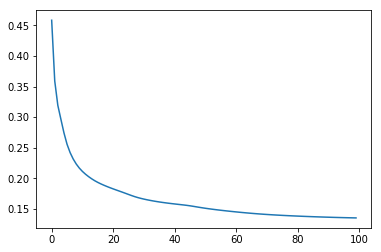

In [13]:
mediaErro = np.zeros(epocas)
Erro = np.zeros(num_entradas_trei)
for i in range(epocas):
 #   print("Época: "+ str(i))    
    for j in range(num_entradas_trei):     
        # Feed Foward
        entrada = entradas_trei[j].reshape(1,NumColunas)
        somaSinapse0 = np.dot(entrada, pesos0)        
        camadaOculta = funcaoAtivacao(somaSinapse0 - PesoBiasOculta.T, Usu_func)  
        soma = np.dot(camadaOculta, pesos1)
        camadaSaida[j]  = funcaoAtivacao(soma, Usu_func)

        # Back Propagation
        erroCamadaSaida = classes_trei[j] - camadaSaida[j]
        Erro[j] =  np.mean(np.abs(erroCamadaSaida))
        
        derivadaSaida  = derivadaParcial(camadaSaida[j], Usu_func)
        GradienteSaida = derivadaSaida * erroCamadaSaida
        GradienteSaida = GradienteSaida.reshape(1,NumClasses) 
        pesos1 = pesos1 + taxaAprendSai * camadaOculta.T * GradienteSaida 
        DerivadaOculta = derivadaParcial(camadaOculta, Usu_func)
        GradienteOculta = (DerivadaOculta.T * (np.dot(pesos1, GradienteSaida.T)))
        pesos0 = pesos0 + taxaAprendOcul * (entrada.T * GradienteOculta.T);
        
        # Decaimento da taxa de Aprendizagem
        taxaAprendOcul = decacimentoTaxaAprend(decaimentoOcul, tipoDecaimentoOcul, taxaAprendOculIni, j, num_entradas_trei)
        taxaAprendSai = decacimentoTaxaAprend(decaimentoSai, tipoDecaimentoSai, taxaAprendSaiIni, j, num_entradas_trei)
                
    mediaErro[i] = np.mean(np.abs(Erro))    
print("Erro Médio: "+ str(np.mean(np.abs(mediaErro))))
plt.plot(mediaErro)

### Organização das Saídas para plotagem da Matriz de Confusão

In [14]:
classesN = [np.argmax(t) for t in classes_trei]
print(classesN)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]


In [15]:
SaidasCalcTrein =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTrein)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

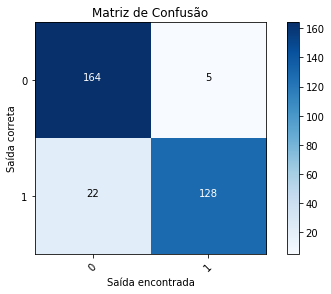

In [17]:
cm = confusion_matrix(classesN, SaidasCalcTrein)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      title='Matriz de Confusão')

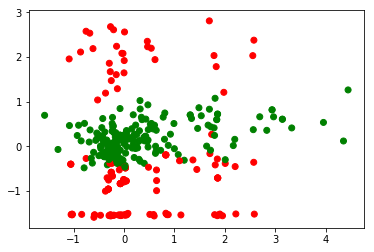

In [18]:
cores = np.array(['green', 'red', 'blue'])

x = entradas_trei[:,3]
y = entradas_trei[:,4]

plt.scatter(x, y, color= cores[SaidasCalcTrein]) 

## Testes

In [19]:
num_entradas_test = len(entradas_test)
camadaSaidaTest = np.zeros((num_entradas_test, NumClasses))

for j in range(num_entradas_test):     
    # Feed Foward
    entrada = entradas_test[j].reshape(1,NumColunas)
    somaSinapse0 = np.dot(entrada, pesos0)        
    camadaOculta = funcaoAtivacao(somaSinapse0 + PesoBiasOculta.T, Usu_func)        
    camadaSaidaTest[j]  = funcaoAtivacao(np.dot(camadaOculta, pesos1), Usu_func)
    
# cálculo do erro
erroCamadaSaida = classes_test - camadaSaidaTest

# Média absoluta do erro
mediaErro = np.mean(np.abs(erroCamadaSaida))
print("Média Absoluta do Erro: "+ str(mediaErro))

Média Absoluta do Erro: 0.15011078678823325


### Organização das Saídas para plotagem da Matriz de Confusão

In [20]:
classesN = [np.argmax(t) for t in classes_test]

In [21]:
SaidasCalcTest =  [np.argmax(t) for t in camadaSaidaTest]

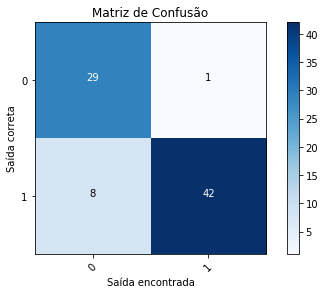

In [22]:
cm = confusion_matrix(classesN, SaidasCalcTest)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      title='Matriz de Confusão')

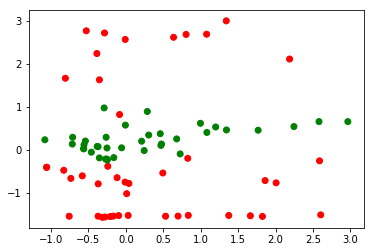

In [23]:
cores = np.array(['green', 'red', 'blue'])

x = entradas_test[:,3]
y = entradas_test[:,4]

plt.scatter(x, y, color= cores[SaidasCalcTest]) 